# **Problemática**

El club ha tenido recientemente problemas con las cancelaciones de membresías, si bien, las cancelaciones son parte del modelo de negocio, últimamente se ha visto o han detectado un incremento en el porcentaje de cancelación de membresías. 

## **Pregunta Principal**

¿Qué factores aumentan la probabilidad de que una membresía sea cancelada? Esto es un problema de clasificación binaria (CANCELED = si/no). 

El objetivo del modelo será predecir la probabilidad de cancelación de cada membresía.

## **DataSet**

El Dataset es una extracción de una base de datos mucho más amplia en columnas pero 'irrelevantes' para el estudio. 

El Dataset final contiene las siguientes columnas:

- **'DATE'** que es la fecha de la membresía. En este caso estoy tomando desde el inicio del club, es decir, julio 2009.

- **'EXPERIENCE CENTER'** que es el hotel en que se originó la venta la membresía. 'Bogota', 'Dominicana', 'Matlali', 'Riviera Maya', Puerto Plata' y 'San Andres'.

- **'AGENCY'** que es el Tour Operador con el que el socio viajó originalmente al destino.

- **'EXPIRATION'** fecha de expiración de la membresía.

- **'SALA'** identificador de la sala.

- **'IDENTIFICADOR'** identificador de seguimiento. Un número consecutivo.

- **'CANCELED'** identificador de cancelación de una membresía.

- **'MEMBRESHIP TYPE'** nivel de la membresía.

- **'SALE TYPE'** tipo de venta. Puede ser nueva, upgrade, downgrade.

- **'COUNTRY'** País de residencia del miembro principal que adquiere la membresía.

- **'PROC VOL'** importe procesable.

- **'CANCELATION VOL'** importe cancelado.

- **'CONCIERGE'** nombre del concierge que atendió.

- **'PROMOTER'** nombre del vendedor principal.

- **'SR PROMOTER'** nombre del vendedor sr principal.

_________

## **Exploración y Limpieza de Datos**

In [3]:
import os
import sys
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\Escritorio 2\06 Análisis de Datos\01 Proyecto de cancelación de membresías\Membership_Cancelations\01_MasterList_Agosto2025.xlsx')
df.head(5)

,DATE,EXPERIENCE CENTERS,AGENCY,EXPIRATION,SALA,IDENTIFICADOR,CANCELED,MEMBERSHIP TYPE,SALE TYPE,COUNTRY,PROC VOL,CANCELATION VOL,CONCIERGE 1,PROMOTER,SR. PROMOTER
0,2009-07-02,SIRMX,TACI01C,2019-07-02,SBM,10001,1,BRONZE,NEW,"SPAIN, SPANISH STATE",4900,4900,10015,10028,10028
1,2009-07-02,SIRMX,BKIT01C,2019-07-02,UBM,10002,0,BRONZE,NEW,UNITED STATES OF AMERICA,2900,0,10014,10033,10034
2,2009-07-03,SIRMX,APPV01C,2019-07-03,UBM,10003,0,BRONZE,NEW,UNITED STATES OF AMERICA,0,0,10015,10020,10020
3,2009-07-03,SIRMX,DIRECTOS-MX,2029-07-03,MSM,10004,0,BRONZE,NEW,MEXICO,0,0,10012,10021,10028
4,2009-07-03,SIRMX,APPV01C,2019-07-03,UBM,10005,0,BRONZE,NEW,UNITED STATES OF AMERICA,0,0,10016,10023,10034


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36287 entries, 0 to 36286
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                36287 non-null  datetime64[ns]
 1   EXPERIENCE CENTERS  36287 non-null  object        
 2   AGENCY              36287 non-null  object        
 3   EXPIRATION          36287 non-null  datetime64[ns]
 4   SALA                36287 non-null  object        
 5   IDENTIFICADOR       36287 non-null  object        
 6   CANCELED            36287 non-null  int64         
 7   MEMBERSHIP TYPE     36286 non-null  object        
 8   SALE TYPE           36287 non-null  object        
 9   COUNTRY             36286 non-null  object        
 10  PROC VOL            36287 non-null  int64         
 11  CANCELATION VOL     36287 non-null  int64         
 12  CONCIERGE  1        36257 non-null  object        
 13  PROMOTER            36250 non-null  object    

In [8]:
print(f'Existen {df.isna().sum().sum()} vacios en nuestro DataFrame')
print(f'Existen {df.isnull().sum().sum()} inexistentes en nuestro DataFrame')

Existen 158 vacios en nuestro DataFrame
Existen 158 inexistentes en nuestro DataFrame


In [9]:
df.nunique()

DATE                   5552
EXPERIENCE CENTERS        6
AGENCY                  613
EXPIRATION            10604
SALA                    321
IDENTIFICADOR         36286
CANCELED                  2
MEMBERSHIP TYPE          71
SALE TYPE                 3
COUNTRY                  80
PROC VOL               4897
CANCELATION VOL         999
CONCIERGE  1            875
PROMOTER                830
SR. PROMOTER            467
dtype: int64

In [10]:
df.isnull().sum()

DATE                   0
EXPERIENCE CENTERS     0
AGENCY                 0
EXPIRATION             0
SALA                   0
IDENTIFICADOR          0
CANCELED               0
MEMBERSHIP TYPE        1
SALE TYPE              0
COUNTRY                1
PROC VOL               0
CANCELATION VOL        0
CONCIERGE  1          30
PROMOTER              37
SR. PROMOTER          89
dtype: int64

### **Insights**

- El dataset presenta tipo de valores correctos en todos las columnas, por lo que no hay que convertir tipos de datos.
- La columna de 'MEMBERSHIP TYPE' tiene 1 valor vacio.
- La columna de 'COUNTRY' tiene 1 valor vacio.
- La columna de 'CONCIERGE 1' tiene 30 valores vacios.
- La columna de 'PROMOTER' tiene 37 valores vacios.
- La columna de 'SR. PROMOTER' tiene 89 valores vacios.

La pregunta es: ¿Qué hago con esos valores y cómo afecta, ya sea que los elimine o que los deje así, en el dataset?

____

In [12]:
def analizar_valores_nulos(df):
    total_registros = len(df)
    

    nulos_por_columna = df.isnull().sum()
    porcentaje_nulos = (nulos_por_columna / total_registros * 100).round(2)
    

    resumen = pd.DataFrame({
        'Columna': nulos_por_columna.index,
        'Valores_Nulos': nulos_por_columna.values,
        'Porcentaje_Nulos': porcentaje_nulos.values,
        'No_Nulos': (total_registros - nulos_por_columna).values,
        'Porcentaje_No_Nulos': (100 - porcentaje_nulos.values).round(2)
    })
    

    resumen = resumen.sort_values('Porcentaje_Nulos', ascending=False)
    

    total_nulos = nulos_por_columna.sum()
    porcentaje_total_nulos = (total_nulos / (total_registros * len(df.columns)) * 100).round(2)
    
    print(f"=== ANÁLISIS DE VALORES NULOS ===")
    print(f"Total de registros: {total_registros:,}")
    print(f"Total de columnas: {len(df.columns)}")
    print(f"Total de valores nulos en todo el dataset: {total_nulos:,}")
    print(f"Porcentaje total de nulos: {porcentaje_total_nulos}%")
    print("\n=== POR COLUMNA ===")
    print(resumen.to_string(index=False))
    
    return resumen


resumen_nulos = analizar_valores_nulos(df)

=== ANÁLISIS DE VALORES NULOS ===
Total de registros: 36,287
Total de columnas: 15
Total de valores nulos en todo el dataset: 158
Porcentaje total de nulos: 0.03%

=== POR COLUMNA ===
           Columna  Valores_Nulos  Porcentaje_Nulos  No_Nulos  Porcentaje_No_Nulos
      SR. PROMOTER             89              0.25     36198                99.75
          PROMOTER             37              0.10     36250                99.90
      CONCIERGE  1             30              0.08     36257                99.92
              DATE              0              0.00     36287               100.00
EXPERIENCE CENTERS              0              0.00     36287               100.00
            AGENCY              0              0.00     36287               100.00
        EXPIRATION              0              0.00     36287               100.00
              SALA              0              0.00     36287               100.00
     IDENTIFICADOR              0              0.00     36287        

### **Insights**

Los valores nulos no representan ni el 1% del dataset por lo que serán eliminados. 

__________

=== VERIFICACIÓN DE CALIDAD DE DATOS ===
Valores negativos en DAYS_ACTIVE: 0
Valores cero en DAYS_ACTIVE: 15
Rango de DAYS_ACTIVE: 0 a 36159 días

=== TASA DE CANCELACIÓN POR DURACIÓN ===
                   Total_Membresías  Cancelaciones  Tasa_Cancelacion  \
DURATION_CATEGORY                                                      
<1 mes                            0              0               NaN   
1-3 meses                         0              0               NaN   
3-6 meses                         0              0               NaN   
6-12 meses                        0              0               NaN   
1-2 años                        225              4             0.018   
>2 años                       36016           6105             0.170   

                   Tasa_Cancelacion_Pct  
DURATION_CATEGORY                        
<1 mes                              NaN  
1-3 meses                           NaN  
3-6 meses                           NaN  
6-12 meses               

C:\Users\danielortega\AppData\Local\Temp\ipykernel_28764\3112897140.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelacion_por_categoria = df.groupby('DURATION_CATEGORY').agg({


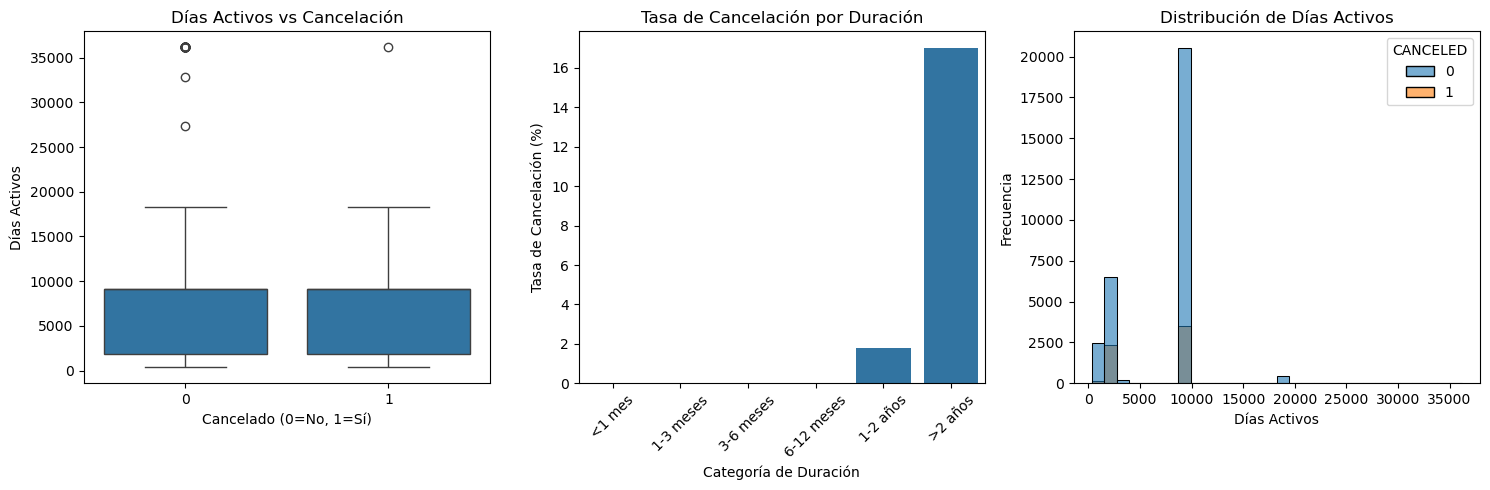


=== ESTADÍSTICAS DESCRIPTIVAS ===
Días activos - Membresías CANCELADAS:
count     6110.000000
mean      6130.445336
std       3773.709809
min        365.000000
25%       1826.000000
50%       9131.000000
75%       9131.000000
max      36159.000000
Name: DAYS_ACTIVE, dtype: float64

Días activos - Membresías ACTIVAS:
count    30162.000000
mean      7033.403223
std       3885.281071
min        365.000000
25%       1827.000000
50%       9131.000000
75%       9131.000000
max      36159.000000
Name: DAYS_ACTIVE, dtype: float64

Diferencia de medias (Cancelados - No Cancelados): -903.0 días


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear la columna DAYS_ACTIVE
df['DAYS_ACTIVE'] = (df['EXPIRATION'] - df['DATE']).dt.days

# Verificar que no hayan valores negativos o inconsistentes
print("=== VERIFICACIÓN DE CALIDAD DE DATOS ===")
print(f"Valores negativos en DAYS_ACTIVE: {(df['DAYS_ACTIVE'] < 0).sum()}")
print(f"Valores cero en DAYS_ACTIVE: {(df['DAYS_ACTIVE'] == 0).sum()}")
print(f"Rango de DAYS_ACTIVE: {df['DAYS_ACTIVE'].min()} a {df['DAYS_ACTIVE'].max()} días")

# Eliminar valores inconsistentes (si los hay)
df_clean = df[df['DAYS_ACTIVE'] > 0].copy()

# Análisis 1: Tasa de cancelación por rango de duración
def analizar_cancelacion_por_duracion(df):
    # Crear categorías de duración
    bins = [0, 30, 90, 180, 365, 730, df['DAYS_ACTIVE'].max()]
    labels = ['<1 mes', '1-3 meses', '3-6 meses', '6-12 meses', '1-2 años', '>2 años']
    
    df['DURATION_CATEGORY'] = pd.cut(df['DAYS_ACTIVE'], bins=bins, labels=labels, right=False)
    
    # Calcular tasa de cancelación por categoría
    cancelacion_por_categoria = df.groupby('DURATION_CATEGORY').agg({
        'CANCELED': ['count', 'sum', 'mean']
    }).round(3)
    
    cancelacion_por_categoria.columns = ['Total_Membresías', 'Cancelaciones', 'Tasa_Cancelacion']
    cancelacion_por_categoria['Tasa_Cancelacion_Pct'] = (cancelacion_por_categoria['Tasa_Cancelacion'] * 100).round(1)
    
    return cancelacion_por_categoria

# Ejecutar análisis
resultados = analizar_cancelacion_por_duracion(df_clean)
print("\n=== TASA DE CANCELACIÓN POR DURACIÓN ===")
print(resultados)

# Análisis 2: Correlación entre días activos y cancelación
correlacion = df_clean['DAYS_ACTIVE'].corr(df_clean['CANCELED'])
print(f"\nCorrelación entre DAYS_ACTIVE y CANCELED: {correlacion:.3f}")

# Visualización 1: Boxplot de días activos vs cancelación
plt.figure(figsize=(15, 5))

# Subplot 1: Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=df_clean, x='CANCELED', y='DAYS_ACTIVE')
plt.title('Días Activos vs Cancelación')
plt.xlabel('Cancelado (0=No, 1=Sí)')
plt.ylabel('Días Activos')

# Subplot 2: Tasa de cancelación por categoría
plt.subplot(1, 3, 2)
sns.barplot(data=resultados.reset_index(), x='DURATION_CATEGORY', y='Tasa_Cancelacion_Pct')
plt.title('Tasa de Cancelación por Duración')
plt.xlabel('Categoría de Duración')
plt.ylabel('Tasa de Cancelación (%)')
plt.xticks(rotation=45)

# Subplot 3: Distribución de días activos
plt.subplot(1, 3, 3)
sns.histplot(data=df_clean, x='DAYS_ACTIVE', hue='CANCELED', bins=30, alpha=0.6)
plt.title('Distribución de Días Activos')
plt.xlabel('Días Activos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Análisis 3: Estadísticas descriptivas por grupo de cancelación
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
stats_cancelados = df_clean[df_clean['CANCELED'] == 1]['DAYS_ACTIVE'].describe()
stats_no_cancelados = df_clean[df_clean['CANCELED'] == 0]['DAYS_ACTIVE'].describe()

print("Días activos - Membresías CANCELADAS:")
print(stats_cancelados)
print("\nDías activos - Membresías ACTIVAS:")
print(stats_no_cancelados)

# Test de diferencia de medias (simplificado)
media_cancelados = stats_cancelados['mean']
media_no_cancelados = stats_no_cancelados['mean']
diferencia_medias = media_cancelados - media_no_cancelados

print(f"\nDiferencia de medias (Cancelados - No Cancelados): {diferencia_medias:.1f} días")

### **Insights Finales de EDA**

- No hay una correlación entre las membresías canceladas y la cantidad de días de uso. 

=== ANÁLISIS DE CANCELACIONES POR HOTEL ===
                    Total_Membresías  Total_Cancelaciones  Tasa_Cancelacion  \
EXPERIENCE CENTERS                                                            
SIRBOG                             8                    6             0.750   
SIRPOP                          3894                 1100             0.282   
SIRDOM                          9211                 2253             0.245   
SIRSA                            173                   25             0.145   
SIRMX                          22604                 2701             0.119   
SIRMATLALI                       397                   38             0.096   

                    Volumen_Procesado  Volumen_Cancelado  \
EXPERIENCE CENTERS                                         
SIRBOG                           1449               5350   
SIRPOP                       28037318            9618305   
SIRDOM                       79251341           20148721   
SIRSA                  

C:\Users\danielortega\AppData\Local\Temp\ipykernel_28764\1177859440.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_hotel.reset_index(),
C:\Users\danielortega\AppData\Local\Temp\ipykernel_28764\1177859440.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_hotel.reset_index(),


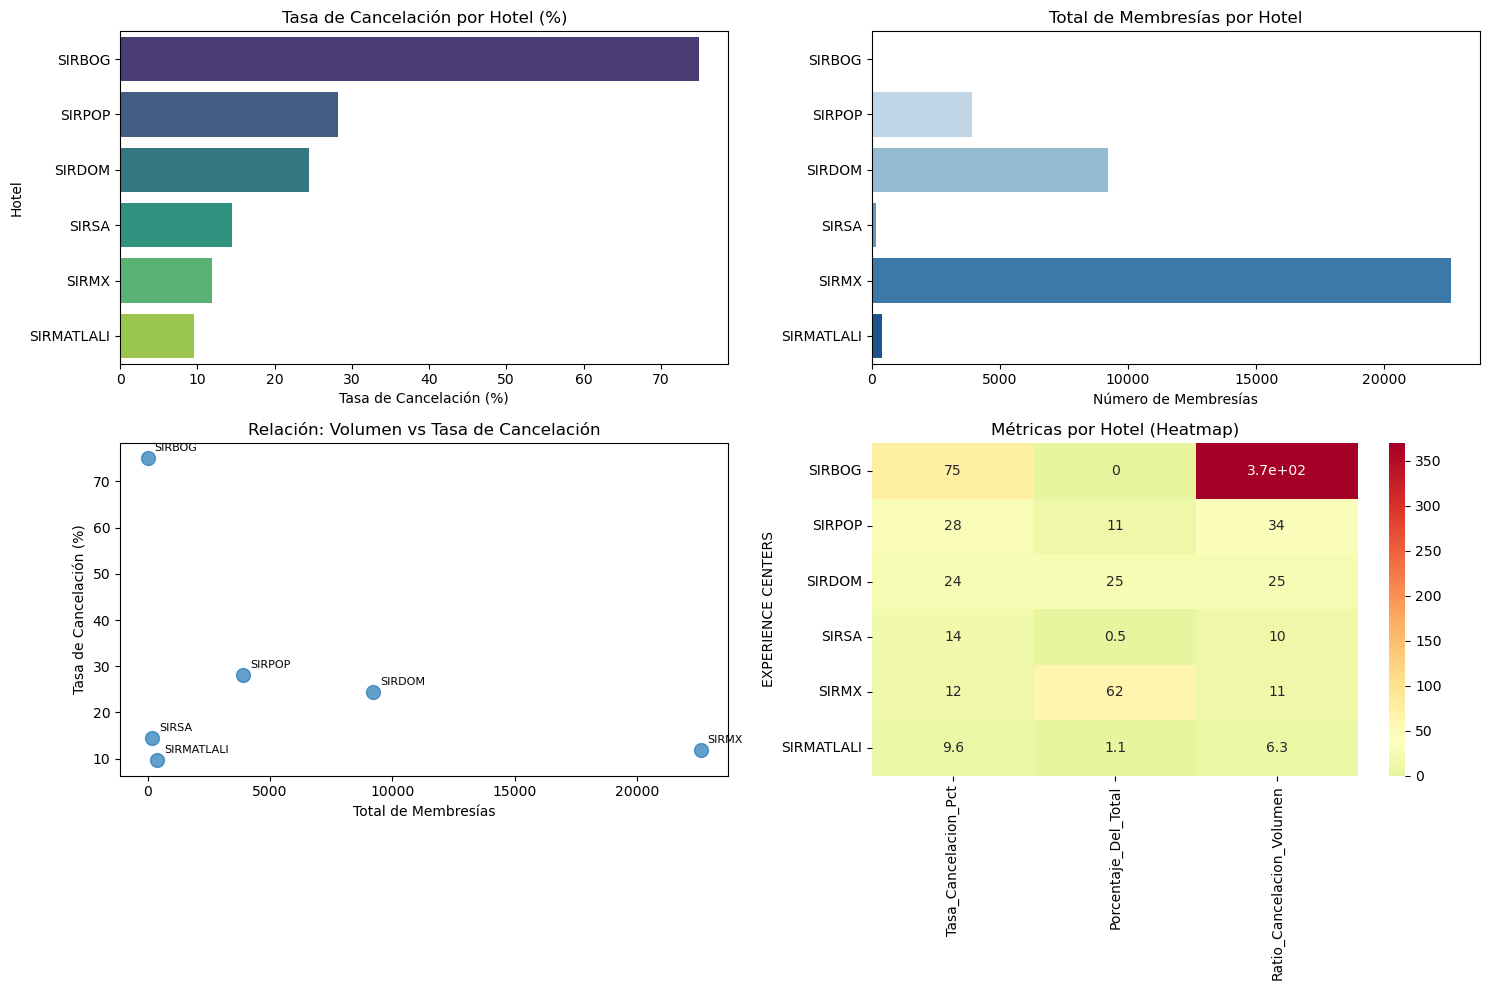


=== HOTELES CON MAYOR TASA DE CANCELACIÓN ===
                    Tasa_Cancelacion_Pct  Total_Membresías  \
EXPERIENCE CENTERS                                           
SIRBOG                              75.0                 8   
SIRPOP                              28.2              3894   
SIRDOM                              24.5              9211   

                    Porcentaje_Del_Total  
EXPERIENCE CENTERS                        
SIRBOG                               0.0  
SIRPOP                              10.7  
SIRDOM                              25.4  

=== HOTELES CON MENOR TASA DE CANCELACIÓN ===
                    Tasa_Cancelacion_Pct  Total_Membresías  \
EXPERIENCE CENTERS                                           
SIRSA                               14.5               173   
SIRMX                               11.9             22604   
SIRMATLALI                           9.6               397   

                    Porcentaje_Del_Total  
EXPERIENCE CENTERS        

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análisis de cancelaciones por hotel/experience center
def analizar_cancelaciones_por_hotel(df):
    print("=== ANÁLISIS DE CANCELACIONES POR HOTEL ===")
    
    # 1. Estadísticas básicas por hotel
    stats_por_hotel = df.groupby('EXPERIENCE CENTERS').agg({
        'CANCELED': ['count', 'sum', 'mean'],
        'PROC VOL': 'sum',
        'CANCELATION VOL': 'sum'
    }).round(3)
    
    # Renombrar columnas
    stats_por_hotel.columns = ['Total_Membresías', 'Total_Cancelaciones', 'Tasa_Cancelacion', 
                              'Volumen_Procesado', 'Volumen_Cancelado']
    
    # Calcular porcentajes y métricas adicionales
    stats_por_hotel['Tasa_Cancelacion_Pct'] = (stats_por_hotel['Tasa_Cancelacion'] * 100).round(1)
    stats_por_hotel['Porcentaje_Del_Total'] = (stats_por_hotel['Total_Membresías'] / len(df) * 100).round(1)
    stats_por_hotel['Ratio_Cancelacion_Volumen'] = (stats_por_hotel['Volumen_Cancelado'] / stats_por_hotel['Volumen_Procesado'] * 100).round(1)
    
    # Ordenar por tasa de cancelación (descendente)
    stats_por_hotel = stats_por_hotel.sort_values('Tasa_Cancelacion_Pct', ascending=False)
    
    return stats_por_hotel

# Ejecutar análisis
resultados_hotel = analizar_cancelaciones_por_hotel(df)
print(resultados_hotel)

# 2. Test de significancia estadística (Chi-cuadrado)
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['EXPERIENCE CENTERS'], df['CANCELED'])
print("\n=== TABLA DE CONTINGENCIA ===")
print(tabla_contingencia)

# Test Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
print(f"\n=== TEST CHI-CUADRADO ===")
print(f"Chi2: {chi2:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Grados de libertad: {dof}")

# Interpretación del p-value
if p_value < 0.05:
    print("✅ Resultado SIGNIFICATIVO: Hay relación entre el hotel y las cancelaciones")
else:
    print("❌ Resultado NO significativo: No hay evidencia de relación entre hotel y cancelaciones")

# 3. Visualizaciones
plt.figure(figsize=(15, 10))

# Subplot 1: Tasa de cancelación por hotel
plt.subplot(2, 2, 1)
sns.barplot(data=resultados_hotel.reset_index(), 
            x='Tasa_Cancelacion_Pct', 
            y='EXPERIENCE CENTERS',
            palette='viridis')
plt.title('Tasa de Cancelación por Hotel (%)')
plt.xlabel('Tasa de Cancelación (%)')
plt.ylabel('Hotel')

# Subplot 2: Volumen de membresías por hotel
plt.subplot(2, 2, 2)
sns.barplot(data=resultados_hotel.reset_index(), 
            x='Total_Membresías', 
            y='EXPERIENCE CENTERS',
            palette='Blues')
plt.title('Total de Membresías por Hotel')
plt.xlabel('Número de Membresías')
plt.ylabel('')

# Subplot 3: Relación volumen vs cancelación
plt.subplot(2, 2, 3)
plt.scatter(resultados_hotel['Total_Membresías'], 
           resultados_hotel['Tasa_Cancelacion_Pct'],
           s=100, alpha=0.7)
plt.xlabel('Total de Membresías')
plt.ylabel('Tasa de Cancelación (%)')
plt.title('Relación: Volumen vs Tasa de Cancelación')

# Anotar nombres de hoteles en el scatter plot
for i, hotel in enumerate(resultados_hotel.index):
    plt.annotate(hotel, 
                (resultados_hotel['Total_Membresías'].iloc[i], 
                 resultados_hotel['Tasa_Cancelacion_Pct'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Subplot 4: Heatmap de tasa de cancelación
plt.subplot(2, 2, 4)
heatmap_data = resultados_hotel[['Tasa_Cancelacion_Pct', 'Porcentaje_Del_Total', 'Ratio_Cancelacion_Volumen']]
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', center=heatmap_data.mean().mean())
plt.title('Métricas por Hotel (Heatmap)')

plt.tight_layout()
plt.show()

# 4. Análisis de outliers y hoteles problemáticos
print("\n=== HOTELES CON MAYOR TASA DE CANCELACIÓN ===")
top_problematicos = resultados_hotel.head(3)
print(top_problematicos[['Tasa_Cancelacion_Pct', 'Total_Membresías', 'Porcentaje_Del_Total']])

print("\n=== HOTELES CON MENOR TASA DE CANCELACIÓN ===")
top_exitosos = resultados_hotel.tail(3)
print(top_exitosos[['Tasa_Cancelacion_Pct', 'Total_Membresías', 'Porcentaje_Del_Total']])

# 5. Análisis de proporciones
print(f"\n=== RESUMEN GENERAL ===")
print(f"Hoteles analizados: {len(resultados_hotel)}")
print(f"Rango de tasas de cancelación: {resultados_hotel['Tasa_Cancelacion_Pct'].min():.1f}% - {resultados_hotel['Tasa_Cancelacion_Pct'].max():.1f}%")
print(f"Tasa de cancelación promedio: {resultados_hotel['Tasa_Cancelacion_Pct'].mean():.1f}%")



In [28]:
# 6. Segmentación por performance (versión mejorada)
resultados_hotel['Segmento'] = pd.cut(resultados_hotel['Tasa_Cancelacion_Pct'], 
                                    bins=[0, 10, 20, 100], 
                                    labels=['Baja', 'Media', 'Alta'])

print("\n=== SEGMENTACIÓN POR PERFORMANCE ===")

# Métricas más útiles por segmento
segmentacion = resultados_hotel.groupby('Segmento').agg({
    'Total_Membresías': ['sum', 'mean'],
    'Tasa_Cancelacion_Pct': ['min', 'max', 'mean'],
    'Volumen_Procesado': 'sum',
    'Volumen_Cancelado': 'sum'
}).round(1)

# Aplanar columnas multi-nivel
segmentacion.columns = ['_'.join(col).strip() for col in segmentacion.columns.values]
segmentacion['Cantidad_Hoteles'] = resultados_hotel.groupby('Segmento').size()

print(segmentacion)

# Resumen ejecutivo
print("\n=== RESUMEN EJECUTIVO ===")
print(f"Hoteles con BAJA cancelación (<10%): {segmentacion.loc['Baja', 'Cantidad_Hoteles']} hoteles")
print(f"Hoteles con MEDIA cancelación (10-20%): {segmentacion.loc['Media', 'Cantidad_Hoteles']} hoteles") 
print(f"Hoteles con ALTA cancelación (>20%): {segmentacion.loc['Alta', 'Cantidad_Hoteles']} hoteles")


=== SEGMENTACIÓN POR PERFORMANCE ===
          Total_Membresías_sum  Total_Membresías_mean  \
Segmento                                                
Baja                       397                  397.0   
Media                    22777                11388.5   
Alta                     13113                 4371.0   

          Tasa_Cancelacion_Pct_min  Tasa_Cancelacion_Pct_max  \
Segmento                                                       
Baja                           9.6                       9.6   
Media                         11.9                      14.5   
Alta                          24.5                      75.0   

          Tasa_Cancelacion_Pct_mean  Volumen_Procesado_sum  \
Segmento                                                     
Baja                            9.6                4037842   
Media                          13.2              230719626   
Alta                           42.6              107290108   

          Volumen_Cancelado_sum  Cantidad_Ho

C:\Users\danielortega\AppData\Local\Temp\ipykernel_28764\2155167349.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentacion = resultados_hotel.groupby('Segmento').agg({
C:\Users\danielortega\AppData\Local\Temp\ipykernel_28764\2155167349.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentacion['Cantidad_Hoteles'] = resultados_hotel.groupby('Segmento').size()


### **Insights**

- Riviera Maya es el centro de experiencia con mayor cantidad de membrerías, pero no es el que tiene el mayor porcentaje de cancelaciones, por el contrario, es el que menos tiene. 
- Puerto Plata y Dominicana son los que tienen el porcentaje más alto de cancelaciones.

=== ANÁLISIS POR MES ===
     YEAR  MONTH MONTH_NAME  Total_Ventas  Cancelaciones_Abs  Volumen_Ventas  \
0    2009      7       July            38                 11          262666   
1    2009      8     August            60                  9          464529   
2    2009      9  September            42                  8          273768   
3    2009     10    October            29                  4          250164   
4    2009     11   November            88                 15          830071   
..    ...    ...        ...           ...                ...             ...   
189  2025      4      April           295                 43         3292923   
190  2025      5        May           248                 26         1965478   
191  2025      6       June           255                 22         1876808   
192  2025      7       July           280                 22         2319984   
193  2025      8     August           338                 16         2964001   

     Volumen_C

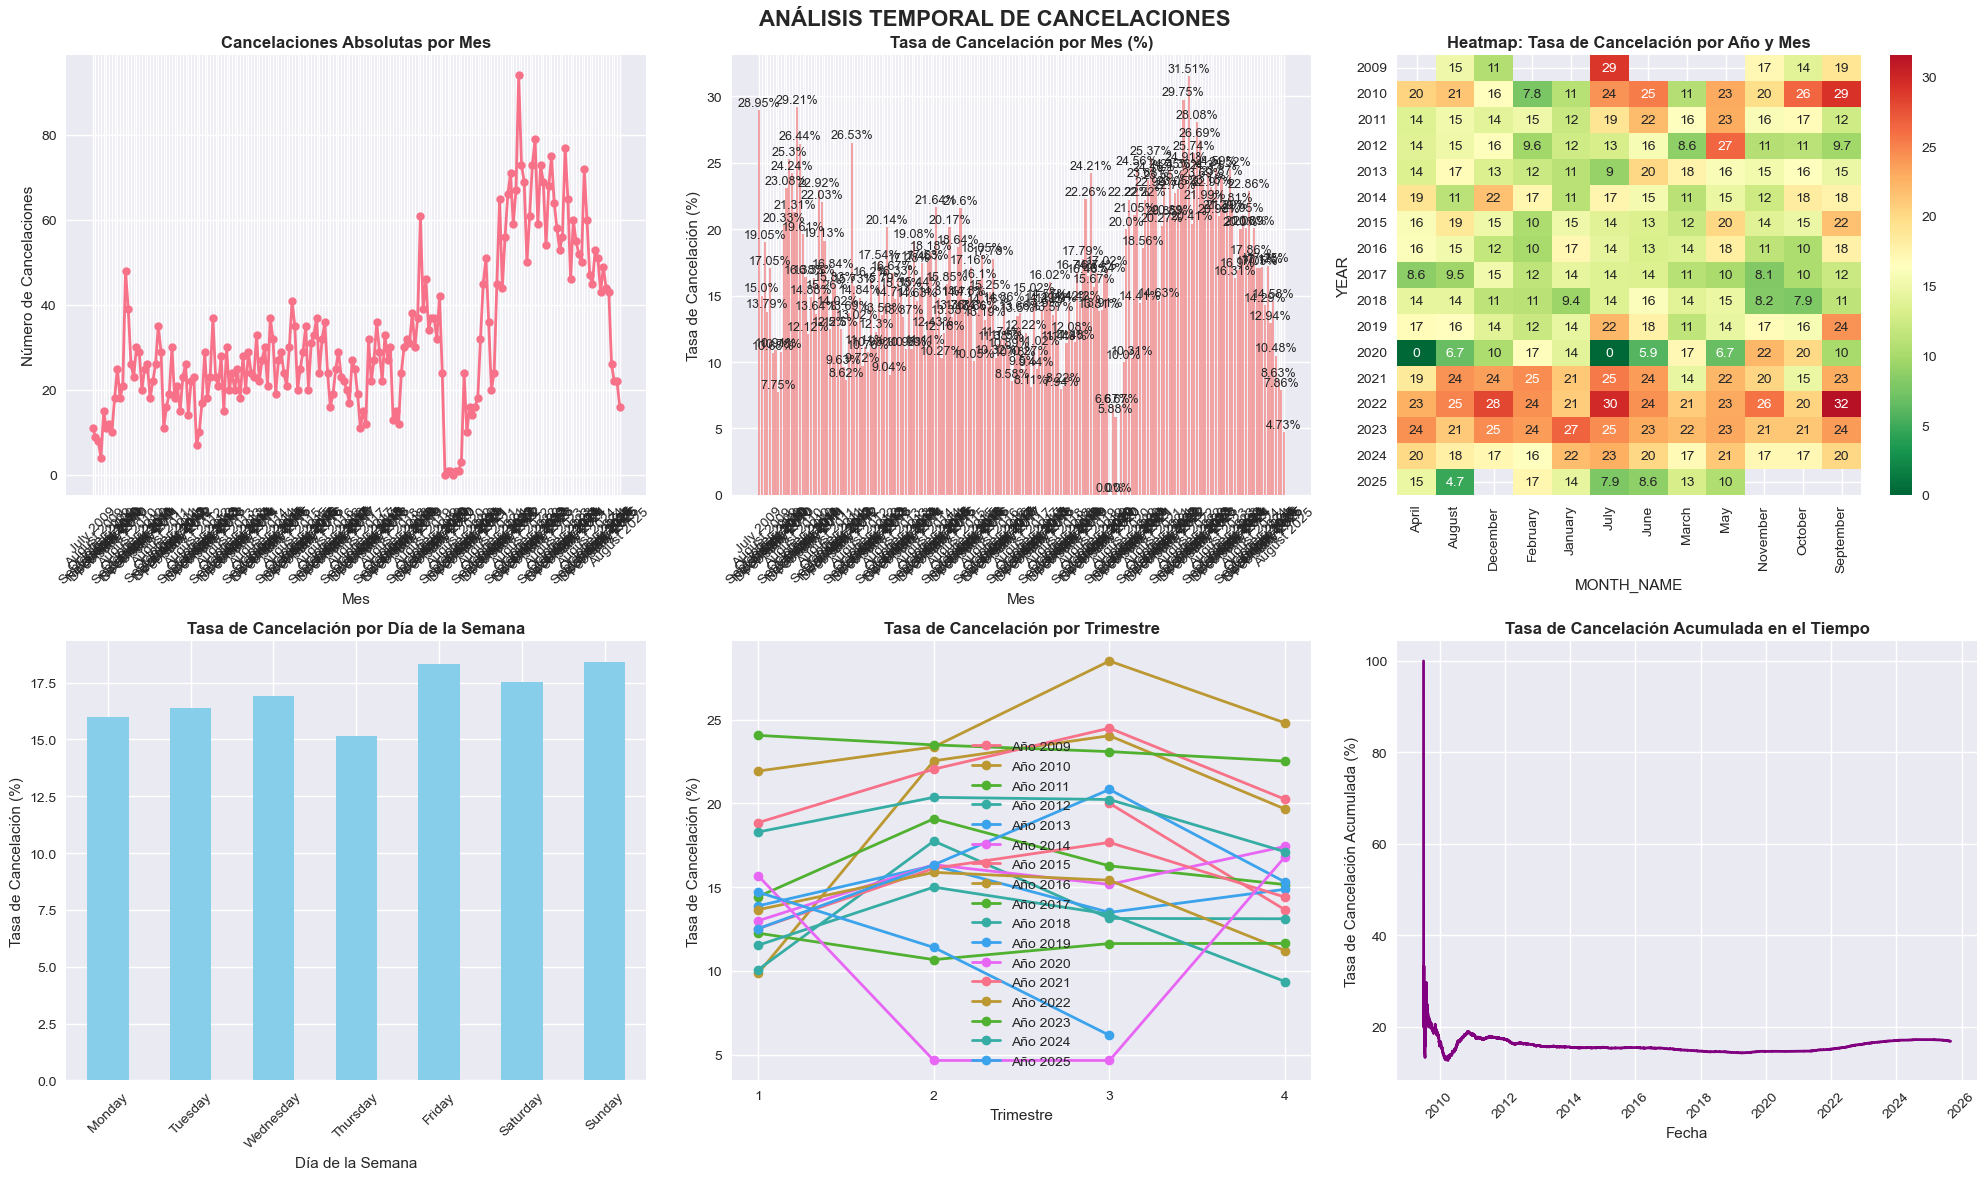


=== ESTADÍSTICAS TEMPORALES CLAVE ===
📈 MES CON MÁS CANCELACIONES: July 2022
   - Cancelaciones: 94
   - Tasa: 29.75%
📉 MES CON MENOS CANCELACIONES: April 2020
   - Cancelaciones: 0
   - Tasa: 0.0%

📊 ESTACIONALIDAD:
   - Tasa promedio: 16.35%
   - Desviación estándar: 5.64%
   - Coeficiente de variación: 34.5%

✅ No se detectaron meses outliers significativos

🔗 Correlación entre volumen de ventas y cancelaciones: -0.145


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Preparar datos temporales
df_temp = df.copy()
df_temp['YEAR'] = df_temp['DATE'].dt.year
df_temp['MONTH'] = df_temp['DATE'].dt.month
df_temp['MONTH_NAME'] = df_temp['DATE'].dt.month_name()
df_temp['WEEKDAY'] = df_temp['DATE'].dt.day_name()
df_temp['QUARTER'] = df_temp['DATE'].dt.quarter
df_temp['WEEK'] = df_temp['DATE'].dt.isocalendar().week

# 2. Análisis por MES (cancelaciones absolutas y tasas)
print("=== ANÁLISIS POR MES ===")
cancelaciones_mensuales = df_temp.groupby(['YEAR', 'MONTH', 'MONTH_NAME']).agg({
    'CANCELED': ['count', 'sum'],
    'PROC VOL': 'sum',
    'CANCELATION VOL': 'sum'
}).round(0)

cancelaciones_mensuales.columns = ['Total_Ventas', 'Cancelaciones_Abs', 'Volumen_Ventas', 'Volumen_Cancelado']
cancelaciones_mensuales['Tasa_Cancelacion'] = (cancelaciones_mensuales['Cancelaciones_Abs'] / cancelaciones_mensuales['Total_Ventas'] * 100).round(2)
cancelaciones_mensuales = cancelaciones_mensuales.reset_index()

print(cancelaciones_mensuales)

# 3. Visualizaciones temporales
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('ANÁLISIS TEMPORAL DE CANCELACIONES', fontsize=16, fontweight='bold')

# Gráfico 1: Cancelaciones absolutas por mes (línea)
ax1 = axes[0, 0]
cancelaciones_mensuales['MES_AÑO'] = cancelaciones_mensuales['MONTH_NAME'] + ' ' + cancelaciones_mensuales['YEAR'].astype(str)
ax1.plot(cancelaciones_mensuales['MES_AÑO'], cancelaciones_mensuales['Cancelaciones_Abs'], 
         marker='o', linewidth=2, markersize=6)
ax1.set_title('Cancelaciones Absolutas por Mes', fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de Cancelaciones')
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Tasa de cancelación por mes (barras)
ax2 = axes[0, 1]
bars = ax2.bar(cancelaciones_mensuales['MES_AÑO'], cancelaciones_mensuales['Tasa_Cancelacion'], 
               color='lightcoral', alpha=0.7)
ax2.set_title('Tasa de Cancelación por Mes (%)', fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Tasa de Cancelación (%)')
ax2.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}%', ha='center', va='bottom', fontsize=9)

# Gráfico 3: Heatmap mensual de cancelaciones
ax3 = axes[0, 2]
heatmap_data = cancelaciones_mensuales.pivot_table(values='Tasa_Cancelacion', 
                                                   index='YEAR', 
                                                   columns='MONTH_NAME', 
                                                   aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', center=heatmap_data.mean().mean(), ax=ax3)
ax3.set_title('Heatmap: Tasa de Cancelación por Año y Mes', fontweight='bold')

# Gráfico 4: Cancelaciones por día de la semana
ax4 = axes[1, 0]
cancelaciones_dia_semana = df_temp.groupby('WEEKDAY').agg({
    'CANCELED': ['count', 'sum']
}).round(0)
cancelaciones_dia_semana.columns = ['Total_Ventas', 'Cancelaciones']
cancelaciones_dia_semana['Tasa'] = (cancelaciones_dia_semana['Cancelaciones'] / cancelaciones_dia_semana['Total_Ventas'] * 100).round(2)
cancelaciones_dia_semana = cancelaciones_dia_semana.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

cancelaciones_dia_semana['Tasa'].plot(kind='bar', ax=ax4, color='skyblue')
ax4.set_title('Tasa de Cancelación por Día de la Semana', fontweight='bold')
ax4.set_xlabel('Día de la Semana')
ax4.set_ylabel('Tasa de Cancelación (%)')
ax4.tick_params(axis='x', rotation=45)

# Gráfico 5: Cancelaciones por trimestre
ax5 = axes[1, 1]
cancelaciones_trimestre = df_temp.groupby(['YEAR', 'QUARTER']).agg({
    'CANCELED': ['count', 'sum']
}).round(0)
cancelaciones_trimestre.columns = ['Total_Ventas', 'Cancelaciones']
cancelaciones_trimestre['Tasa'] = (cancelaciones_trimestre['Cancelaciones'] / cancelaciones_trimestre['Total_Ventas'] * 100).round(2)
cancelaciones_trimestre = cancelaciones_trimestre.reset_index()

for year in cancelaciones_trimestre['YEAR'].unique():
    year_data = cancelaciones_trimestre[cancelaciones_trimestre['YEAR'] == year]
    ax5.plot(year_data['QUARTER'], year_data['Tasa'], marker='o', label=f'Año {year}', linewidth=2)

ax5.set_title('Tasa de Cancelación por Trimestre', fontweight='bold')
ax5.set_xlabel('Trimestre')
ax5.set_ylabel('Tasa de Cancelación (%)')
ax5.legend()
ax5.set_xticks([1, 2, 3, 4])

# Gráfico 6: Serie temporal acumulada
ax6 = axes[1, 2]
df_temp_sorted = df_temp.sort_values('DATE')
df_temp_sorted['Cancelaciones_Acumuladas'] = df_temp_sorted['CANCELED'].cumsum()
df_temp_sorted['Ventas_Acumuladas'] = range(1, len(df_temp_sorted) + 1)
df_temp_sorted['Tasa_Acumulada'] = (df_temp_sorted['Cancelaciones_Acumuladas'] / df_temp_sorted['Ventas_Acumuladas'] * 100).round(2)

ax6.plot(df_temp_sorted['DATE'], df_temp_sorted['Tasa_Acumulada'], linewidth=2, color='purple')
ax6.set_title('Tasa de Cancelación Acumulada en el Tiempo', fontweight='bold')
ax6.set_xlabel('Fecha')
ax6.set_ylabel('Tasa de Cancelación Acumulada (%)')
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Análisis estadístico de patrones temporales
print("\n=== ESTADÍSTICAS TEMPORALES CLAVE ===")

# Mes con mayor/menor cancelación
mes_max_cancel = cancelaciones_mensuales.loc[cancelaciones_mensuales['Cancelaciones_Abs'].idxmax()]
mes_min_cancel = cancelaciones_mensuales.loc[cancelaciones_mensuales['Cancelaciones_Abs'].idxmin()]

print(f"📈 MES CON MÁS CANCELACIONES: {mes_max_cancel['MONTH_NAME']} {mes_max_cancel['YEAR']}")
print(f"   - Cancelaciones: {mes_max_cancel['Cancelaciones_Abs']}")
print(f"   - Tasa: {mes_max_cancel['Tasa_Cancelacion']}%")

print(f"📉 MES CON MENOS CANCELACIONES: {mes_min_cancel['MONTH_NAME']} {mes_min_cancel['YEAR']}")
print(f"   - Cancelaciones: {mes_min_cancel['Cancelaciones_Abs']}")
print(f"   - Tasa: {mes_min_cancel['Tasa_Cancelacion']}%")

# Estacionalidad
tasa_promedio = cancelaciones_mensuales['Tasa_Cancelacion'].mean()
desviacion_estacional = cancelaciones_mensuales['Tasa_Cancelacion'].std()

print(f"\n📊 ESTACIONALIDAD:")
print(f"   - Tasa promedio: {tasa_promedio:.2f}%")
print(f"   - Desviación estándar: {desviacion_estacional:.2f}%")
print(f"   - Coeficiente de variación: {(desviacion_estacional/tasa_promedio*100):.1f}%")

# 5. Identificar outliers temporales
Q1 = cancelaciones_mensuales['Tasa_Cancelacion'].quantile(0.25)
Q3 = cancelaciones_mensuales['Tasa_Cancelacion'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

meses_outliers = cancelaciones_mensuales[cancelaciones_mensuales['Tasa_Cancelacion'] > limite_superior]

if not meses_outliers.empty:
    print(f"\n🚨 MESES OUTLIERS (Alta cancelación):")
    for _, mes in meses_outliers.iterrows():
        print(f"   - {mes['MONTH_NAME']} {mes['YEAR']}: {mes['Tasa_Cancelacion']}%")
else:
    print(f"\n✅ No se detectaron meses outliers significativos")

# 6. Correlación temporal
df_temp['MES_NUM'] = df_temp['DATE'].dt.month
correlacion_mensual = df_temp.groupby(['YEAR', 'MONTH']).agg({
    'CANCELED': 'mean',
    'PROC VOL': 'mean'
}).corr().iloc[0, 1]

print(f"\n🔗 Correlación entre volumen de ventas y cancelaciones: {correlacion_mensual:.3f}")

# **Modelo Predictivo ML - Regresión Logística**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [35]:
# 1. Preparación de características (Feature Engineering)
print("=== PREPARACIÓN DE CARACTERÍSTICAS ===")

df_ml = df.copy()

# Crear variable objetivo PRIMERO
y = df_ml['CANCELED']

# Ingeniería de características temporales
df_ml['YEAR'] = df_ml['DATE'].dt.year
df_ml['MONTH'] = df_ml['DATE'].dt.month
df_ml['DAY_OF_WEEK'] = df_ml['DATE'].dt.dayofweek
df_ml['DAY_OF_MONTH'] = df_ml['DATE'].dt.day
df_ml['IS_WEEKEND'] = (df_ml['DATE'].dt.dayofweek >= 5).astype(int)

# Duración de la membresía (si existe fecha de expiración)
if 'EXPIRATION' in df_ml.columns:
    df_ml['MEMBERSHIP_DURATION'] = (df_ml['EXPIRATION'] - df_ml['DATE']).dt.days
    # Identificar filas con duraciones válidas
    mask_duracion_valida = df_ml['MEMBERSHIP_DURATION'] > 0
    print(f"Filas con duración válida: {mask_duracion_valida.sum()}")
    print(f"Filas eliminadas por duración inválida: {(~mask_duracion_valida).sum()}")
    
    # Aplicar el filtro tanto a X como a y
    df_ml = df_ml[mask_duracion_valida]
    y = y[mask_duracion_valida]  # Sincronizar y con el filtro

# Variables categóricas a considerar
categorical_features = ['EXPERIENCE CENTERS', 'AGENCY', 'SALA', 'MEMBERSHIP TYPE', 
                       'SALE TYPE', 'COUNTRY', 'CONCIERGE 1', 'PROMOTER', 'SR. PROMOTER']

# Codificar variables categóricas
label_encoders = {}
for feature in categorical_features:
    if feature in df_ml.columns:
        # Manejar valores nulos
        df_ml[feature] = df_ml[feature].fillna('Unknown')
        # Codificar
        le = LabelEncoder()
        df_ml[f'{feature}_encoded'] = le.fit_transform(df_ml[feature])
        label_encoders[feature] = le

# Seleccionar características finales
feature_columns = [
    'YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'IS_WEEKEND',
    'PROC VOL', 'CANCELATION VOL'
]

# Agregar características codificadas
for feature in categorical_features:
    if feature in df_ml.columns:
        feature_columns.append(f'{feature}_encoded')

# Agregar duración si existe
if 'MEMBERSHIP_DURATION' in df_ml.columns:
    feature_columns.append('MEMBERSHIP_DURATION')

X = df_ml[feature_columns]

# VERIFICACIÓN CRÍTICA: Sincronizar índices
print(f"\n=== VERIFICACIÓN DE TAMAÑOS ===")
print(f"Tamaño de X: {X.shape}")
print(f"Tamaño de y: {y.shape}")

# Asegurar que los índices estén alineados
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print(f"Tamaño de X después de reset_index: {X.shape}")
print(f"Tamaño de y después de reset_index: {y.shape}")

# Verificar que no haya valores nulos en X
print(f"Valores nulos en X: {X.isnull().sum().sum()}")


=== PREPARACIÓN DE CARACTERÍSTICAS ===
Filas con duración válida: 36272
Filas eliminadas por duración inválida: 15

=== VERIFICACIÓN DE TAMAÑOS ===
Tamaño de X: (36272, 16)
Tamaño de y: (36272,)
Tamaño de X después de reset_index: (36272, 16)
Tamaño de y después de reset_index: (36272,)
Valores nulos en X: 0


In [36]:
# 2. División train-test (SOLUCIÓN AL ERROR)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"\n✅ DIVISIÓN TRAIN-TEST EXITOSA")
    print(f"Train: {X_train.shape[0]} muestras")
    print(f"Test: {X_test.shape[0]} muestras")
    print(f"Características: {X_train.shape[1]}")

except ValueError as e:
    print(f"❌ Error en la división: {e}")
    
    # Solución alternativa: división simple sin stratify
    print("Intentando división sin stratify...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    print(f"✅ DIVISIÓN ALTERNATIVA EXITOSA")
    print(f"Train: {X_train.shape[0]} muestras")
    print(f"Test: {X_test.shape[0]} muestras")




✅ DIVISIÓN TRAIN-TEST EXITOSA
Train: 25390 muestras
Test: 10882 muestras
Características: 16


=== PREPARACIÓN DE CARACTERÍSTICAS ===
Filas con duración válida: 36272
Filas eliminadas por duración inválida: 15

=== VERIFICACIÓN DE TAMAÑOS ===
Tamaño de X: (36272, 16)
Tamaño de y: (36272,)
Tamaño de X después de reset_index: (36272, 16)
Tamaño de y después de reset_index: (36272,)
¿Tamaños iguales? True
Valores nulos en X: 0

Características seleccionadas: 16
Balance de clases: CANCELED
0    0.831551
1    0.168449
Name: proportion, dtype: float64

=== DIVISIÓN TRAIN-TEST ===
✅ División con stratify exitosa
Train: 25390 muestras
Test: 10882 muestras
Balance en train: CANCELED
0    0.831548
1    0.168452
Name: proportion, dtype: float64
Balance en test: CANCELED
0    0.831557
1    0.168443
Name: proportion, dtype: float64

=== ENTRENAMIENTO DE MODELOS ===

🔧 Entrenando Logistic Regression...
   ✅ Accuracy: 0.9554
   ✅ AUC-ROC: 0.9540

🔧 Entrenando Random Forest...
   ✅ Accuracy: 0.9667
   ✅ AUC-ROC: 0.9927

🔧 Entrenando Gradient Boosting...
   ✅ Accuracy: 0.9687
   ✅ AUC-ROC: 0.993

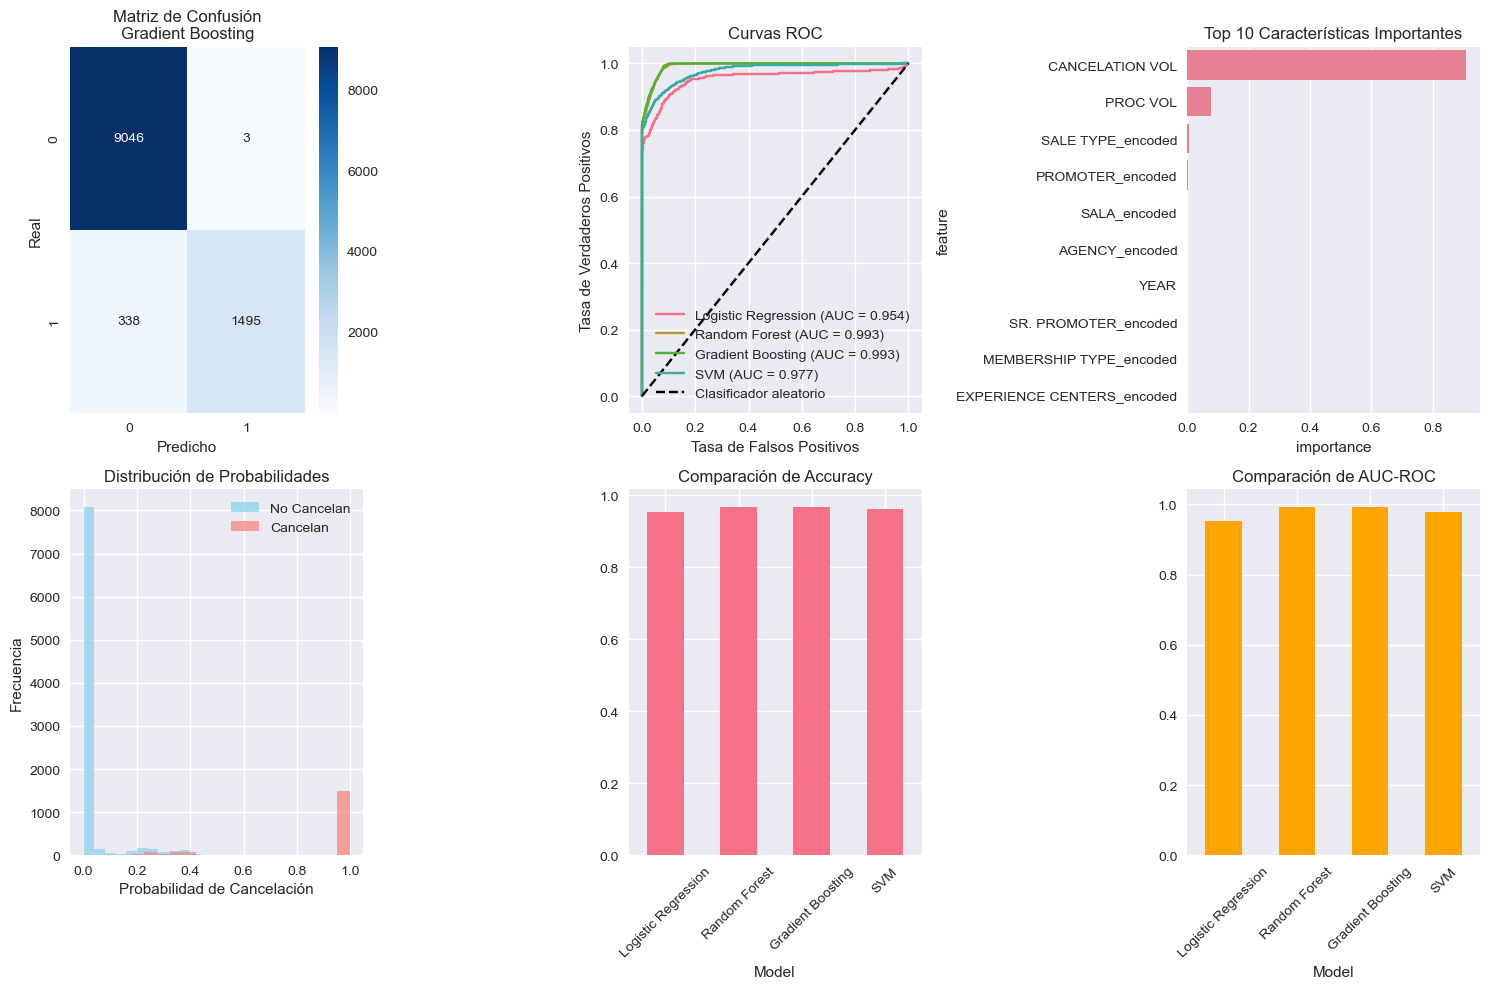


=== ANÁLISIS DE ERRORES ===
Falsos Positivos: 3 (0.03%)
Falsos Negativos: 338 (3.11%)

🎯 BUSCANDO UMBRAL ÓPTIMO ===
Umbral óptimo para maximizar F1-score: 0.40
F1-score máximo: 0.8998

=== VALIDACIÓN CRUZADA (Gradient Boosting) ===
AUC-ROC en validación cruzada: 0.9904 (+/- 0.0074)

=== RECOMENDACIONES ===
✅ EXCELENTE: El modelo tiene alto poder predictivo
   - Puede usarse para identificar miembros en riesgo
   - Implementar sistema de alertas tempranas

💡 Aplicaciones prácticas:
   - Sistema de alerta temprana para miembros en riesgo
   - Priorización de esfuerzos de retención
   - Optimización de campañas de fidelización
   - Análisis de factores de riesgo específicos

📊 Resumen final:
   - Mejor modelo: Gradient Boosting
   - AUC-ROC: 0.9934
   - Accuracy: 0.9687


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Preparación de características (Feature Engineering) - CORREGIDO
print("=== PREPARACIÓN DE CARACTERÍSTICAS ===")

df_ml = df.copy()

# Crear variable objetivo PRIMERO
y = df_ml['CANCELED']

# Ingeniería de características temporales
df_ml['YEAR'] = df_ml['DATE'].dt.year
df_ml['MONTH'] = df_ml['DATE'].dt.month
df_ml['DAY_OF_WEEK'] = df_ml['DATE'].dt.dayofweek
df_ml['DAY_OF_MONTH'] = df_ml['DATE'].dt.day
df_ml['IS_WEEKEND'] = (df_ml['DATE'].dt.dayofweek >= 5).astype(int)

# Duración de la membresía (si existe fecha de expiración) - CORREGIDO
if 'EXPIRATION' in df_ml.columns:
    df_ml['MEMBERSHIP_DURATION'] = (df_ml['EXPIRATION'] - df_ml['DATE']).dt.days
    # Identificar filas con duraciones válidas
    mask_duracion_valida = df_ml['MEMBERSHIP_DURATION'] > 0
    print(f"Filas con duración válida: {mask_duracion_valida.sum()}")
    print(f"Filas eliminadas por duración inválida: {(~mask_duracion_valida).sum()}")
    
    # Aplicar el filtro tanto a X como a y - CORRECCIÓN CLAVE
    df_ml = df_ml[mask_duracion_valida]
    y = y[mask_duracion_valida]  # Sincronizar y con el filtro

# Variables categóricas a considerar
categorical_features = ['EXPERIENCE CENTERS', 'AGENCY', 'SALA', 'MEMBERSHIP TYPE', 
                       'SALE TYPE', 'COUNTRY', 'CONCIERGE 1', 'PROMOTER', 'SR. PROMOTER']

# Codificar variables categóricas
label_encoders = {}
for feature in categorical_features:
    if feature in df_ml.columns:
        # Manejar valores nulos
        df_ml[feature] = df_ml[feature].fillna('Unknown')
        # Codificar
        le = LabelEncoder()
        df_ml[f'{feature}_encoded'] = le.fit_transform(df_ml[feature])
        label_encoders[feature] = le

# Seleccionar características finales
feature_columns = [
    'YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'IS_WEEKEND',
    'PROC VOL', 'CANCELATION VOL'
]

# Agregar características codificadas
for feature in categorical_features:
    if feature in df_ml.columns:
        feature_columns.append(f'{feature}_encoded')

# Agregar duración si existe
if 'MEMBERSHIP_DURATION' in df_ml.columns:
    feature_columns.append('MEMBERSHIP_DURATION')

X = df_ml[feature_columns]

# VERIFICACIÓN CRÍTICA: Sincronizar índices - CORREGIDO
print(f"\n=== VERIFICACIÓN DE TAMAÑOS ===")
print(f"Tamaño de X: {X.shape}")
print(f"Tamaño de y: {y.shape}")

# Asegurar que los índices estén alineados
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print(f"Tamaño de X después de reset_index: {X.shape}")
print(f"Tamaño de y después de reset_index: {y.shape}")
print(f"¿Tamaños iguales? {X.shape[0] == y.shape[0]}")

# Verificar que no haya valores nulos en X
print(f"Valores nulos en X: {X.isnull().sum().sum()}")

print(f"\nCaracterísticas seleccionadas: {len(feature_columns)}")
print(f"Balance de clases: {y.value_counts(normalize=True)}")

# 2. División train-test - CORREGIDO CON MANEJO DE ERRORES
print(f"\n=== DIVISIÓN TRAIN-TEST ===")

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    print("✅ División con stratify exitosa")
except ValueError as e:
    print(f"⚠️ Error con stratify: {e}")
    print("Intentando división sin stratify...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    print("✅ División sin stratify exitosa")

print(f"Train: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")
print(f"Balance en train: {y_train.value_counts(normalize=True)}")
print(f"Balance en test: {y_test.value_counts(normalize=True)}")

# 3. Definición de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# 4. Entrenamiento y evaluación
results = {}

print("\n=== ENTRENAMIENTO DE MODELOS ===")

for name, model in models.items():
    print(f"\n🔧 Entrenando {name}...")
    
    try:
        # Pipeline con escalado
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        # Entrenar modelo
        pipeline.fit(X_train, y_train)
        
        # Predecir
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        # Métricas
        accuracy = pipeline.score(X_test, y_test)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'auc': auc_score,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"   ✅ Accuracy: {accuracy:.4f}")
        print(f"   ✅ AUC-ROC: {auc_score:.4f}")
        
    except Exception as e:
        print(f"   ❌ Error entrenando {name}: {e}")
        # Continuar con el siguiente modelo

# Verificar que hay resultados
if not results:
    print("❌ No se pudo entrenar ningún modelo. Revisar los datos.")
    exit()

# 5. Comparación de modelos
print("\n=== COMPARACIÓN DE MODELOS ===")
results_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'AUC-ROC': [results[name]['auc'] for name in results]
}).sort_values('AUC-ROC', ascending=False)

print(results_df)

# 6. Mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']
probabilities = results[best_model_name]['probabilities']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")

# 7. Métricas detalladas del mejor modelo
print(f"\n=== REPORTE DETALLADO - {best_model_name} ===")
print(classification_report(y_test, y_pred_best))

# 8. Visualizaciones - COMPLETAMENTE CORREGIDO
def crear_visualizaciones_seguras(results, X_test, y_test, feature_columns, best_model_name):
    """Crear visualizaciones con manejo robusto de errores"""
    
    best_model = results[best_model_name]['model']
    y_pred_best = results[best_model_name]['predictions']
    probabilities = results[best_model_name]['probabilities']
    
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Matriz de confusión
    plt.subplot(2, 3, 1)
    try:
        cm = confusion_matrix(y_test, y_pred_best)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión\n{best_model_name}')
        plt.xlabel('Predicho')
        plt.ylabel('Real')
    except Exception as e:
        plt.text(0.5, 0.5, f'Error en matriz\n{str(e)[:20]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Matriz de Confusión')
    
    # Subplot 2: Curva ROC
    plt.subplot(2, 3, 2)
    try:
        for name, result in results.items():
            fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
            plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curvas ROC')
        plt.legend()
    except Exception as e:
        plt.text(0.5, 0.5, f'Error en ROC\n{str(e)[:20]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Curva ROC')
    
    # Subplot 3: Importancia de características (con manejo de errores)
    plt.subplot(2, 3, 3)
    try:
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            importances = best_model.named_steps['classifier'].feature_importances_
            feature_importance_df = pd.DataFrame({
                'feature': feature_columns,
                'importance': importances
            }).sort_values('importance', ascending=False).head(10)
            
            sns.barplot(data=feature_importance_df, x='importance', y='feature')
            plt.title('Top 10 Características Importantes')
        else:
            plt.text(0.5, 0.5, 'No disponible\n(No es modelo de árbol)', 
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Importancia de Características')
    except Exception as e:
        plt.text(0.5, 0.5, f'Error\n{str(e)[:30]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Importancia')
    
    # Subplot 4: Distribución de probabilidades
    plt.subplot(2, 3, 4)
    try:
        plt.hist(probabilities[y_test == 0], alpha=0.7, label='No Cancelan', bins=20, color='skyblue')
        plt.hist(probabilities[y_test == 1], alpha=0.7, label='Cancelan', bins=20, color='salmon')
        plt.xlabel('Probabilidad de Cancelación')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Probabilidades')
        plt.legend()
    except Exception as e:
        plt.text(0.5, 0.5, f'Error\n{str(e)[:20]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Distribución')
    
    # Subplot 5: Comparación de accuracy
    plt.subplot(2, 3, 5)
    try:
        results_df = pd.DataFrame({
            'Model': results.keys(),
            'Accuracy': [results[name]['accuracy'] for name in results]
        })
        results_df.plot(x='Model', y='Accuracy', kind='bar', legend=False, ax=plt.gca())
        plt.title('Comparación de Accuracy')
        plt.xticks(rotation=45)
    except Exception as e:
        plt.text(0.5, 0.5, f'Error\n{str(e)[:20]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Comparación')
    
    # Subplot 6: Comparación de AUC-ROC
    plt.subplot(2, 3, 6)
    try:
        results_df = pd.DataFrame({
            'Model': results.keys(),
            'AUC-ROC': [results[name]['auc'] for name in results]
        })
        results_df.plot(x='Model', y='AUC-ROC', kind='bar', legend=False, color='orange', ax=plt.gca())
        plt.title('Comparación de AUC-ROC')
        plt.xticks(rotation=45)
    except Exception as e:
        plt.text(0.5, 0.5, f'Error\n{str(e)[:20]}...', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Error en Comparación AUC')
    
    plt.tight_layout()
    plt.show()

# Llamar a la función de visualización segura
crear_visualizaciones_seguras(results, X_test, y_test, feature_columns, best_model_name)

# 9. Análisis de errores
print("\n=== ANÁLISIS DE ERRORES ===")

try:
    # Identificar falsos positivos y falsos negativos
    test_with_predictions = X_test.copy()
    test_with_predictions['ACTUAL'] = y_test
    test_with_predictions['PREDICTED'] = y_pred_best
    test_with_predictions['PROBABILITY'] = probabilities

    # Falsos positivos (predijo cancelación pero no canceló)
    false_positives = test_with_predictions[
        (test_with_predictions['ACTUAL'] == 0) & 
        (test_with_predictions['PREDICTED'] == 1)
    ]

    # Falsos negativos (predijo no cancelación pero canceló)
    false_negatives = test_with_predictions[
        (test_with_predictions['ACTUAL'] == 1) & 
        (test_with_predictions['PREDICTED'] == 0)
    ]

    print(f"Falsos Positivos: {len(false_positives)} ({len(false_positives)/len(X_test)*100:.2f}%)")
    print(f"Falsos Negativos: {len(false_negatives)} ({len(false_negatives)/len(X_test)*100:.2f}%)")
    
except Exception as e:
    print(f"Error en análisis de errores: {e}")

# 10. Umbral óptimo (maximizar F1-score)
print(f"\n🎯 BUSCANDO UMBRAL ÓPTIMO ===")

try:
    thresholds = np.arange(0.1, 0.9, 0.05)
    f1_scores = []

    for threshold in thresholds:
        y_pred_threshold = (probabilities >= threshold).astype(int)
        f1_scores.append(f1_score(y_test, y_pred_threshold))

    optimal_threshold = thresholds[np.argmax(f1_scores)]
    optimal_f1 = max(f1_scores)
    print(f"Umbral óptimo para maximizar F1-score: {optimal_threshold:.2f}")
    print(f"F1-score máximo: {optimal_f1:.4f}")
    
except Exception as e:
    print(f"Error calculando umbral óptimo: {e}")

# 11. Validación cruzada
print(f"\n=== VALIDACIÓN CRUZADA ({best_model_name}) ===")

try:
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
    print(f"AUC-ROC en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
except Exception as e:
    print(f"Error en validación cruzada: {e}")

# 12. Recomendaciones basadas en resultados
print(f"\n=== RECOMENDACIONES ===")

final_auc = results[best_model_name]['auc']
if final_auc >= 0.8:
    print("✅ EXCELENTE: El modelo tiene alto poder predictivo")
    print("   - Puede usarse para identificar miembros en riesgo")
    print("   - Implementar sistema de alertas tempranas")
elif final_auc >= 0.7:
    print("⚠️  BUENO: El modelo tiene poder predictivo moderado")
    print("   - Útil como herramienta de apoyo a la decisión")
    print("   - Combinar con criterios de expertos")
else:
    print("❌ LIMITADO: El modelo necesita mejora")
    print("   - Considerar más características o datos")
    print("   - Revisar calidad de los datos")

print(f"\n💡 Aplicaciones prácticas:")
print("   - Sistema de alerta temprana para miembros en riesgo")
print("   - Priorización de esfuerzos de retención")
print("   - Optimización de campañas de fidelización")
print("   - Análisis de factores de riesgo específicos")

print(f"\n📊 Resumen final:")
print(f"   - Mejor modelo: {best_model_name}")
print(f"   - AUC-ROC: {final_auc:.4f}")
print(f"   - Accuracy: {results[best_model_name]['accuracy']:.4f}")

=== PREPARACIÓN DE CARACTERÍSTICAS ===
✅ Columnas eliminadas: ['CANCELATION VOL', 'PROC VOL']
📊 Filas con duración válida: 36272
🔧 Codificando variables categóricas...

✅ VERIFICACIÓN FINAL:
   Tamaño de X: (36272, 15)
   Tamaño de y: (36272,)
   Características: 15
   Balance de clases: CANCELED
0    0.832
1    0.168
Name: proportion, dtype: float64
   Características usadas: ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'IS_WEEKEND', 'DAY_OF_YEAR', 'EXPERIENCE CENTERS_encoded', 'AGENCY_encoded', 'SALA_encoded', 'MEMBERSHIP TYPE_encoded', 'SALE TYPE_encoded', 'COUNTRY_encoded', 'PROMOTER_encoded', 'SR. PROMOTER_encoded', 'MEMBERSHIP_DURATION']

=== DIVISIÓN TRAIN-TEST ===
✅ Train: 25390 muestras
✅ Test: 10882 muestras
✅ Balance en train: CANCELED
0    0.832
1    0.168
Name: proportion, dtype: float64

=== ENTRENAMIENTO DE MODELOS ===

🔧 Logistic Regression...
   ✅ Accuracy: 0.6266
   ✅ AUC-ROC: 0.6658
   ✅ F1-Score: 0.3649

🔧 Random Forest...
   ✅ Accuracy: 0.8284
   ✅ AUC-ROC: 0.7

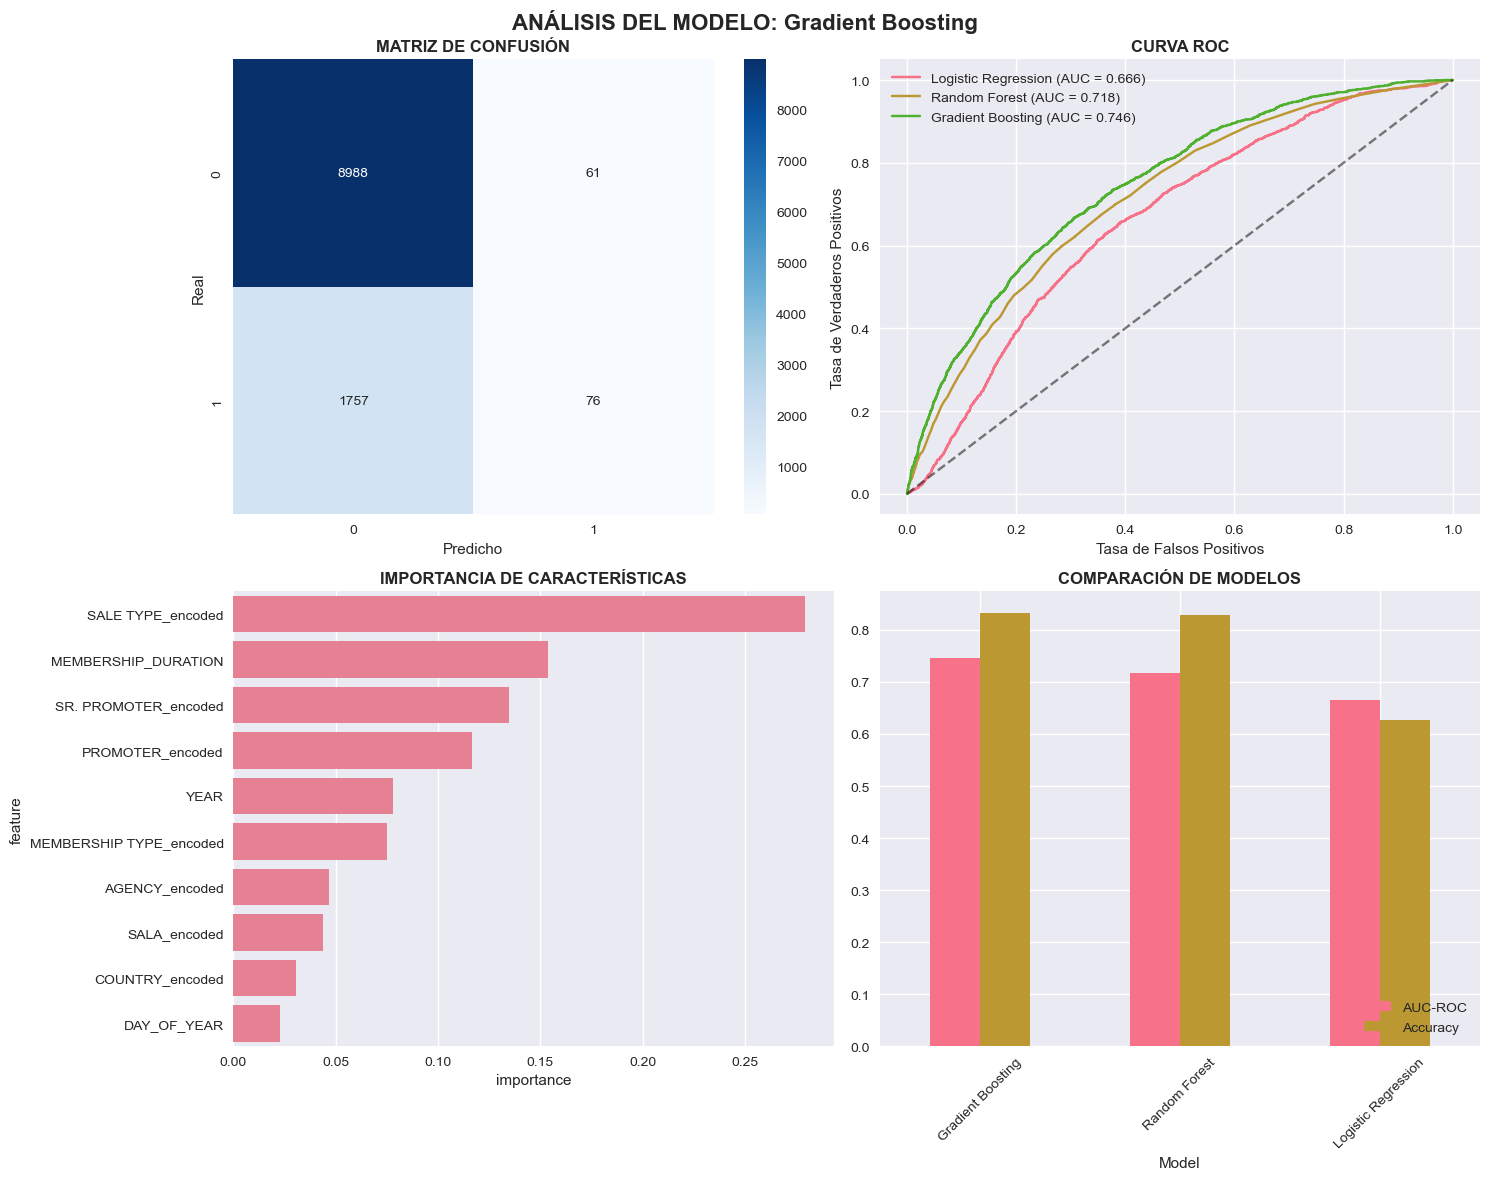


🔍 ANÁLISIS DETALLADO DE ERRORES
❌ Falsos Positivos: 61 (0.56%)
❌ Falsos Negativos: 1757 (16.15%)

🎯 OPTIMIZACIÓN DE UMBRAL
Umbral actual (0.5): F1-Score = 0.0772
Umbral óptimo (0.20): F1-Score = 0.4211
Mejora: 0.3439

💡 RECOMENDACIONES EJECUTIVAS
⚠️  BUENO: Poder predictivo moderado
   - Usar como herramienta de apoyo
   - Combinar con criterios de expertos

📈 MÉTRICAS FINALES:
   - Modelo: Gradient Boosting
   - AUC-ROC: 0.7462
   - Accuracy: 0.8329
   - F1-Score: 0.0772

🚀 PRÓXIMOS PASOS SUGERIDOS:
   1. Validar con datos más recientes
   2. Implementar monitoreo continuo
   3. Crear dashboard de seguimiento
   4. Establecer protocolos de acción


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. PREPARACIÓN DE DATOS - LIMPIO Y SEGURO
print("=== PREPARACIÓN DE CARACTERÍSTICAS ===")

df_ml = df.copy()

# Eliminar columnas que podrían causar data leakage
columnas_a_eliminar = ['CANCELATION VOL', 'PROC VOL']
df_ml = df_ml.drop(columns=[col for col in columnas_a_eliminar if col in df_ml.columns])
print(f"✅ Columnas eliminadas: {columnas_a_eliminar}")

# Crear variable objetivo PRIMERO
y = df_ml['CANCELED']

# Ingeniería de características temporales
df_ml['YEAR'] = df_ml['DATE'].dt.year
df_ml['MONTH'] = df_ml['DATE'].dt.month
df_ml['DAY_OF_WEEK'] = df_ml['DATE'].dt.dayofweek
df_ml['DAY_OF_MONTH'] = df_ml['DATE'].dt.day
df_ml['IS_WEEKEND'] = (df_ml['DATE'].dt.dayofweek >= 5).astype(int)
df_ml['DAY_OF_YEAR'] = df_ml['DATE'].dt.dayofyear

# Duración de la membresía - CON SINCRONIZACIÓN DE ÍNDICES
if 'EXPIRATION' in df_ml.columns:
    df_ml['MEMBERSHIP_DURATION'] = (df_ml['EXPIRATION'] - df_ml['DATE']).dt.days
    mask_duracion_valida = df_ml['MEMBERSHIP_DURATION'] > 0
    print(f"📊 Filas con duración válida: {mask_duracion_valida.sum()}")
    
    # SINCRONIZAR FILTROS EN X E Y
    df_ml = df_ml[mask_duracion_valida]
    y = y[mask_duracion_valida]

# Variables categóricas
categorical_features = ['EXPERIENCE CENTERS', 'AGENCY', 'SALA', 'MEMBERSHIP TYPE', 
                       'SALE TYPE', 'COUNTRY', 'CONCIERGE 1', 'PROMOTER', 'SR. PROMOTER']

# Codificar variables categóricas
print("🔧 Codificando variables categóricas...")
for feature in categorical_features:
    if feature in df_ml.columns:
        df_ml[feature] = df_ml[feature].fillna('Unknown')
        le = LabelEncoder()
        df_ml[f'{feature}_encoded'] = le.fit_transform(df_ml[feature])

# SELECCIÓN DE CARACTERÍSTICAS (SIN LAS COLUMNAS ELIMINADAS)
feature_columns = [
    'YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'IS_WEEKEND', 'DAY_OF_YEAR'
]

# Agregar características codificadas
for feature in categorical_features:
    if feature in df_ml.columns:
        feature_columns.append(f'{feature}_encoded')

# Agregar duración si existe
if 'MEMBERSHIP_DURATION' in df_ml.columns:
    feature_columns.append('MEMBERSHIP_DURATION')

X = df_ml[feature_columns]

# VERIFICACIÓN CRÍTICA DE TAMAÑOS
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

print(f"\n✅ VERIFICACIÓN FINAL:")
print(f"   Tamaño de X: {X.shape}")
print(f"   Tamaño de y: {y.shape}")
print(f"   Características: {len(feature_columns)}")
print(f"   Balance de clases: {y.value_counts(normalize=True).round(3)}")
print(f"   Características usadas: {feature_columns}")

# 2. DIVISIÓN TRAIN-TEST ROBUSTA
print(f"\n=== DIVISIÓN TRAIN-TEST ===")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"✅ Train: {X_train.shape[0]} muestras")
print(f"✅ Test: {X_test.shape[0]} muestras")
print(f"✅ Balance en train: {y_train.value_counts(normalize=True).round(3)}")

# 3. DEFINICIÓN DE MODELOS MÁS SIMPLES
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# 4. ENTRENAMIENTO CON MANEJO DE ERRORES
print("\n=== ENTRENAMIENTO DE MODELOS ===")
results = {}

for name, model in models.items():
    print(f"\n🔧 {name}...")
    
    try:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        accuracy = pipeline.score(X_test, y_test)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred)
        
        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'auc': auc_score,
            'f1': f1,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"   ✅ Accuracy: {accuracy:.4f}")
        print(f"   ✅ AUC-ROC: {auc_score:.4f}")
        print(f"   ✅ F1-Score: {f1:.4f}")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

# 5. ANÁLISIS DE RESULTADOS
if not results:
    print("❌ No se pudo entrenar ningún modelo")
    exit()

results_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'AUC-ROC': [results[name]['auc'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results]
}).sort_values('AUC-ROC', ascending=False)

print("\n" + "="*50)
print("📊 COMPARACIÓN DE MODELOS")
print("="*50)
print(results_df.round(4))

best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n🏆 MEJOR MODELO: {best_model_name}")

# 6. REPORTE DETALLADO DEL MEJOR MODELO
print(f"\n📈 REPORTE DETALLADO - {best_model_name}")
print("="*40)
y_pred_best = results[best_model_name]['predictions']
print(classification_report(y_test, y_pred_best))

# 7. VISUALIZACIONES CLARAS Y SIMPLES
print("\n📊 GENERANDO VISUALIZACIONES...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'ANÁLISIS DEL MODELO: {best_model_name}', fontsize=16, fontweight='bold')

# Matriz de confusión
axes[0, 0].set_title('MATRIZ DE CONFUSIÓN', fontweight='bold')
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicho')
axes[0, 0].set_ylabel('Real')

# Curva ROC
axes[0, 1].set_title('CURVA ROC', fontweight='bold')
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    axes[0, 1].plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 1].set_xlabel('Tasa de Falsos Positivos')
axes[0, 1].set_ylabel('Tasa de Verdaderos Positivos')
axes[0, 1].legend()

# Importancia de características (si aplica)
axes[1, 0].set_title('IMPORTANCIA DE CARACTERÍSTICAS', fontweight='bold')
try:
    if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_imp_df = pd.DataFrame({
            'feature': feature_columns,
            'importance': importances
        }).sort_values('importance', ascending=False).head(10)
        
        sns.barplot(data=feature_imp_df, x='importance', y='feature', ax=axes[1, 0])
    else:
        axes[1, 0].text(0.5, 0.5, 'No disponible para este modelo', 
                       ha='center', va='center', transform=axes[1, 0].transAxes,
                       fontsize=12, style='italic')
except:
    axes[1, 0].text(0.5, 0.5, 'Error al calcular importancia', 
                   ha='center', va='center', transform=axes[1, 0].transAxes,
                   fontsize=12, style='italic')

# Comparación de modelos
axes[1, 1].set_title('COMPARACIÓN DE MODELOS', fontweight='bold')
results_df.plot(x='Model', y=['AUC-ROC', 'Accuracy'], kind='bar', ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# 8. ANÁLISIS DE ERRORES DETALLADO
print("\n🔍 ANÁLISIS DETALLADO DE ERRORES")
print("="*40)

# Falsos positivos/negativos
fp_mask = (y_test == 0) & (y_pred_best == 1)
fn_mask = (y_test == 1) & (y_pred_best == 0)

print(f"❌ Falsos Positivos: {fp_mask.sum()} ({fp_mask.mean()*100:.2f}%)")
print(f"❌ Falsos Negativos: {fn_mask.sum()} ({fn_mask.mean()*100:.2f}%)")

# 9. UMBRAL ÓPTIMO
print(f"\n🎯 OPTIMIZACIÓN DE UMBRAL")
probabilities = results[best_model_name]['probabilities']

thresholds = np.linspace(0.1, 0.9, 17)
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (probabilities >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Umbral actual (0.5): F1-Score = {f1_score(y_test, (probabilities >= 0.5).astype(int)):.4f}")
print(f"Umbral óptimo ({optimal_threshold:.2f}): F1-Score = {optimal_f1:.4f}")
print(f"Mejora: {optimal_f1 - f1_score(y_test, (probabilities >= 0.5).astype(int)):.4f}")

# 10. RECOMENDACIONES EJECUTIVAS
print(f"\n💡 RECOMENDACIONES EJECUTIVAS")
print("="*40)

final_auc = results[best_model_name]['auc']
final_accuracy = results[best_model_name]['accuracy']

if final_auc >= 0.8:
    print("✅ EXCELENTE: Alto poder predictivo")
    print("   - Implementar sistema de alertas automáticas")
    print("   - Usar para priorización de retención")
elif final_auc >= 0.7:
    print("⚠️  BUENO: Poder predictivo moderado")
    print("   - Usar como herramienta de apoyo")
    print("   - Combinar con criterios de expertos")
else:
    print("❌ LIMITADO: Necesita mejora")
    print("   - Recolectar más datos/métricas")
    print("   - Considerar otras variables predictoras")

print(f"\n📈 MÉTRICAS FINALES:")
print(f"   - Modelo: {best_model_name}")
print(f"   - AUC-ROC: {final_auc:.4f}")
print(f"   - Accuracy: {final_accuracy:.4f}")
print(f"   - F1-Score: {results[best_model_name]['f1']:.4f}")

print(f"\n🚀 PRÓXIMOS PASOS SUGERIDOS:")
print("   1. Validar con datos más recientes")
print("   2. Implementar monitoreo continuo")
print("   3. Crear dashboard de seguimiento")
print("   4. Establecer protocolos de acción")

=== ANÁLISIS DE RIESGO DE CANCELACIÓN POR FACTOR ===
📊 Tasa global de cancelación: 0.169 (16.9%)

🛍️  ANÁLISIS POR TIPO DE VENTA (SALE TYPE)
           Total_Ventas  Cancelaciones  Tasa_Cancelacion  Clientes_Unicos  \
SALE TYPE                                                                   
NEW               25199           5391            0.2139            25198   
DNG                3084            387            0.1255             3084   
UPG                8004            345            0.0431             8004   

           Tasa_Cancelacion_Pct  Riesgo_Relativo  Diferencia_Global_Pct  
SALE TYPE                                                                
NEW                       21.39             1.27                   4.52  
DNG                       12.55             0.74                  -4.32  
UPG                        4.31             0.26                 -12.56  

👤 ANÁLISIS POR PROMOTER
Promotores analizados: 457 (con ≥10 ventas)
          Total_Ventas  Cancelacio

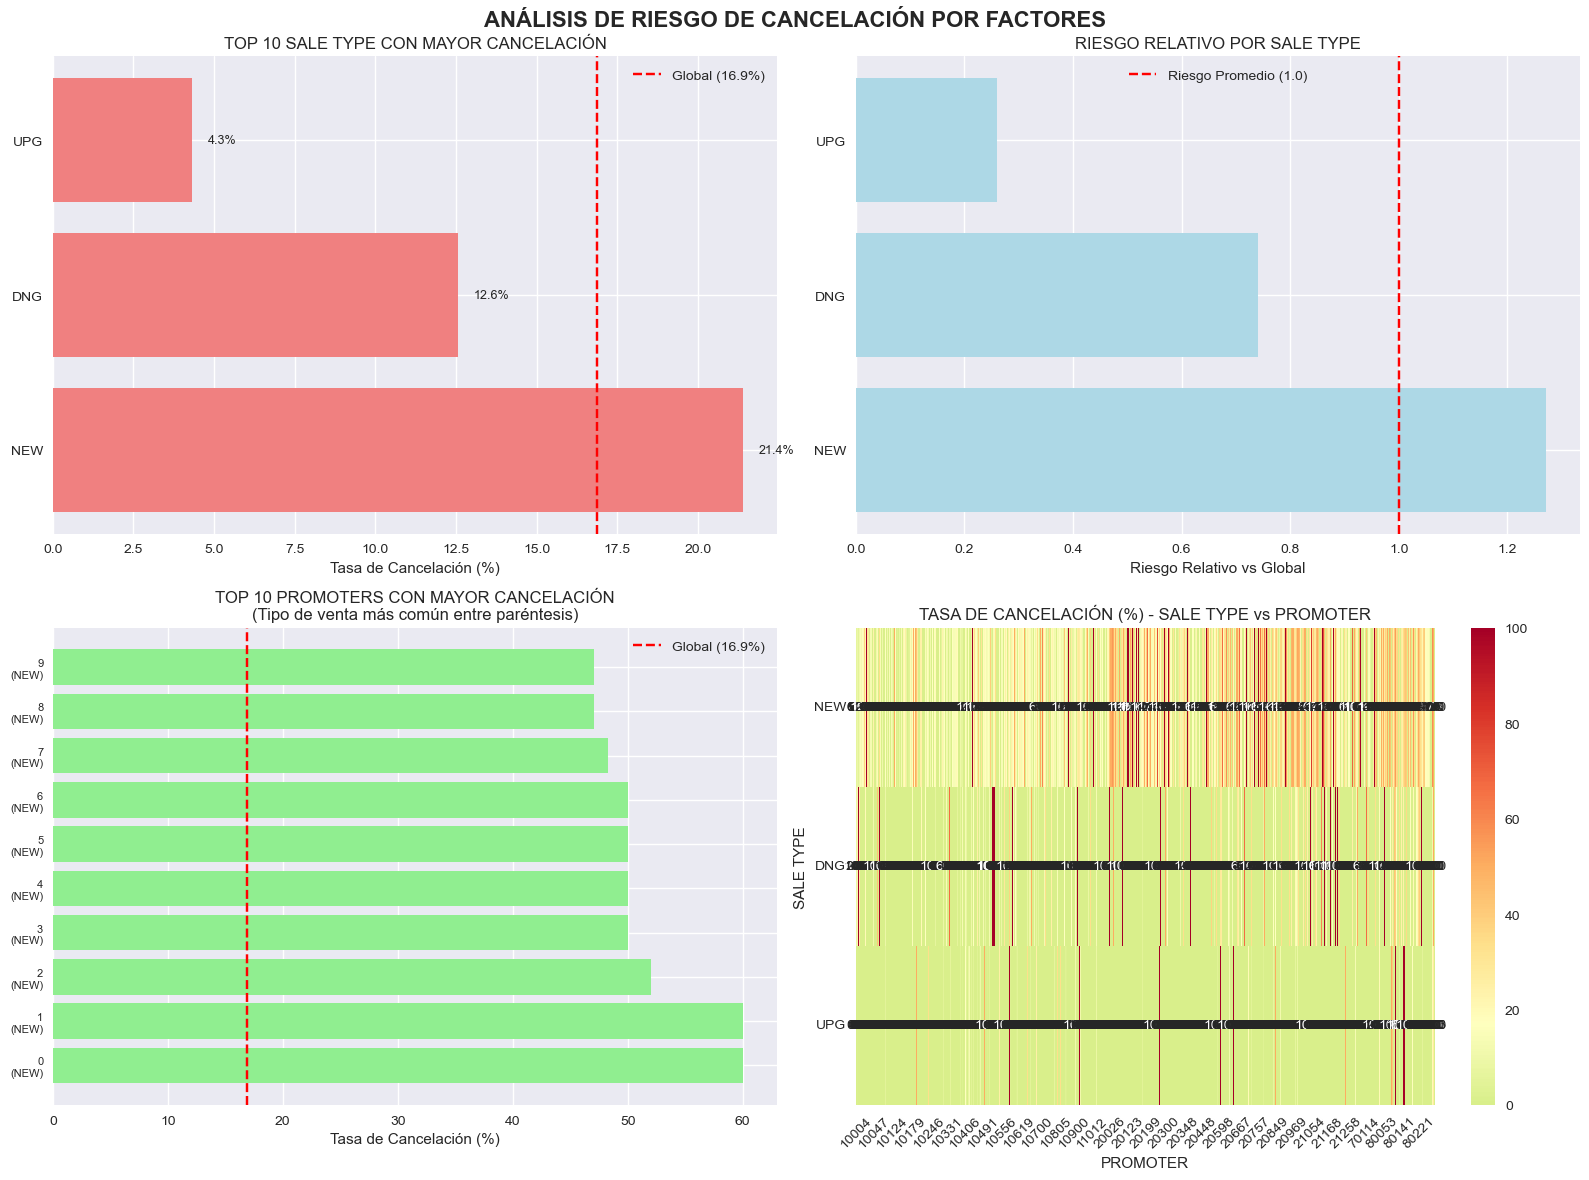


💡 RESUMEN EJECUTIVO Y RECOMENDACIONES
🚨 MAYORES RIESGOS IDENTIFICADOS:

🛍️  SALE TYPES DE ALTO RIESGO:
   1. NEW: 21.39% cancelación
      (Riesgo 1.27x mayor vs promedio)
   2. DNG: 12.55% cancelación
      (Riesgo 0.74x mayor vs promedio)
   3. UPG: 4.31% cancelación
      (Riesgo 0.26x mayor vs promedio)

👤 PROMOTERS DE ALTO RIESGO:
   1. 20156: 60.0% cancelación
      Tipo de venta común: NEW
   2. 30016: 60.0% cancelación
      Tipo de venta común: NEW
   3. 80127: 52.0% cancelación
      Tipo de venta común: NEW

👨‍💼 SR. PROMOTERS DE ALTO RIESGO:
   1. 80104: 47.77% cancelación
      Promotores a cargo: 29
   2. 20035: 47.62% cancelación
      Promotores a cargo: 5
   3. 21051: 45.45% cancelación
      Promotores a cargo: 5

📋 TABLA MAESTRA DE RIESGOS (RESUMEN)
     Factor Categoria  Tasa_Cancelacion_Pct  Riesgo_Relativo  Volumen
   PROMOTER     20156                 60.00             3.56     10.0
   PROMOTER     30016                 60.00             3.56     20.0
   PROMOTER

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ANÁLISIS DE TASA DE CANCELACIÓN POR FACTOR
print("=== ANÁLISIS DE RIESGO DE CANCELACIÓN POR FACTOR ===")

# Crear DataFrame para análisis
df_analisis = df.copy()

# Calcular tasa de cancelación global (baseline)
tasa_global = df_analisis['CANCELED'].mean()
print(f"📊 Tasa global de cancelación: {tasa_global:.3f} ({tasa_global*100:.1f}%)\n")

# 2. ANÁLISIS POR SALE TYPE
print("🛍️  ANÁLISIS POR TIPO DE VENTA (SALE TYPE)")
print("="*50)

sale_type_analysis = df_analisis.groupby('SALE TYPE').agg({
    'CANCELED': ['count', 'sum', 'mean'],
    'IDENTIFICADOR': 'nunique'
}).round(4)

sale_type_analysis.columns = ['Total_Ventas', 'Cancelaciones', 'Tasa_Cancelacion', 'Clientes_Unicos']
sale_type_analysis['Tasa_Cancelacion_Pct'] = (sale_type_analysis['Tasa_Cancelacion'] * 100).round(2)
sale_type_analysis['Riesgo_Relativo'] = (sale_type_analysis['Tasa_Cancelacion'] / tasa_global).round(2)
sale_type_analysis['Diferencia_Global_Pct'] = ((sale_type_analysis['Tasa_Cancelacion'] - tasa_global) * 100).round(2)

sale_type_analysis = sale_type_analysis.sort_values('Tasa_Cancelacion', ascending=False)

print(sale_type_analysis)

# 3. ANÁLISIS POR PROMOTER
print("\n👤 ANÁLISIS POR PROMOTER")
print("="*50)

# Filtrar promoters con suficiente volumen (mínimo 10 ventas)
promoter_stats = df_analisis.groupby('PROMOTER').agg({
    'CANCELED': ['count', 'sum', 'mean'],
    'SALE TYPE': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(4)

promoter_stats.columns = ['Total_Ventas', 'Cancelaciones', 'Tasa_Cancelacion', 'Tipo_Venta_Mas_Comun']
promoter_stats = promoter_stats[promoter_stats['Total_Ventas'] >= 10]  # Mínimo 10 ventas
promoter_stats['Tasa_Cancelacion_Pct'] = (promoter_stats['Tasa_Cancelacion'] * 100).round(2)
promoter_stats['Riesgo_Relativo'] = (promoter_stats['Tasa_Cancelacion'] / tasa_global).round(2)

promoter_stats = promoter_stats.sort_values('Tasa_Cancelacion', ascending=False)

print(f"Promotores analizados: {len(promoter_stats)} (con ≥10 ventas)")
print(promoter_stats.head(10))  # Top 10 con mayor tasa

# 4. ANÁLISIS POR SR. PROMOTER
print("\n👨‍💼 ANÁLISIS POR SR. PROMOTER")
print("="*50)

sr_promoter_stats = df_analisis.groupby('SR. PROMOTER').agg({
    'CANCELED': ['count', 'sum', 'mean'],
    'PROMOTER': 'nunique',
    'SALE TYPE': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(4)

sr_promoter_stats.columns = ['Total_Ventas', 'Cancelaciones', 'Tasa_Cancelacion', 'Promotores_a_Cargo', 'Tipo_Venta_Mas_Comun']
sr_promoter_stats = sr_promoter_stats[sr_promoter_stats['Total_Ventas'] >= 20]  # Mínimo 20 ventas
sr_promoter_stats['Tasa_Cancelacion_Pct'] = (sr_promoter_stats['Tasa_Cancelacion'] * 100).round(2)
sr_promoter_stats['Riesgo_Relativo'] = (sr_promoter_stats['Tasa_Cancelacion'] / tasa_global).round(2)

sr_promoter_stats = sr_promoter_stats.sort_values('Tasa_Cancelacion', ascending=False)

print(f"Sr. Promotores analizados: {len(sr_promoter_stats)} (con ≥20 ventas)")
print(sr_promoter_stats.head(10))

# 5. ANÁLISIS COMBINADO (SALE TYPE + PROMOTER)
print("\n🔗 ANÁLISIS COMBINADO: SALE TYPE + PROMOTER")
print("="*50)

combinacion_stats = df_analisis.groupby(['SALE TYPE', 'PROMOTER']).agg({
    'CANCELED': ['count', 'sum', 'mean'],
    'SR. PROMOTER': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(4)

combinacion_stats.columns = ['Total_Ventas', 'Cancelaciones', 'Tasa_Cancelacion', 'Sr_Promoter_Asociado']
combinacion_stats = combinacion_stats[combinacion_stats['Total_Ventas'] >= 5]  # Mínimo 5 ventas por combinación
combinacion_stats['Tasa_Cancelacion_Pct'] = (combinacion_stats['Tasa_Cancelacion'] * 100).round(2)
combinacion_stats['Riesgo_Relativo'] = (combinacion_stats['Tasa_Cancelacion'] / tasa_global).round(2)

combinacion_stats = combinacion_stats.sort_values('Tasa_Cancelacion', ascending=False)

print(f"Combinaciones analizadas: {len(combinacion_stats)} (con ≥5 ventas)")
print(combinacion_stats.head(15))

# 6. VISUALIZACIONES
print("\n📊 GENERANDO VISUALIZACIONES...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE RIESGO DE CANCELACIÓN POR FACTORES', fontsize=16, fontweight='bold')

# Gráfico 1: Tasa de cancelación por SALE TYPE
top_sale_types = sale_type_analysis.head(10)
bars1 = axes[0, 0].barh(top_sale_types.index.astype(str), top_sale_types['Tasa_Cancelacion_Pct'], color='lightcoral')
axes[0, 0].axvline(x=tasa_global*100, color='red', linestyle='--', label=f'Global ({tasa_global*100:.1f}%)')
axes[0, 0].set_xlabel('Tasa de Cancelación (%)')
axes[0, 0].set_title('TOP 10 SALE TYPE CON MAYOR CANCELACIÓN')
axes[0, 0].legend()

# Añadir valores en las barras
for bar in bars1:
    width = bar.get_width()
    axes[0, 0].text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                   ha='left', va='center', fontsize=9)

# Gráfico 2: Riesgo relativo por SALE TYPE
axes[0, 1].barh(top_sale_types.index.astype(str), top_sale_types['Riesgo_Relativo'], color='lightblue')
axes[0, 1].axvline(x=1, color='red', linestyle='--', label='Riesgo Promedio (1.0)')
axes[0, 1].set_xlabel('Riesgo Relativo vs Global')
axes[0, 1].set_title('RIESGO RELATIVO POR SALE TYPE')
axes[0, 1].legend()

# Gráfico 3: Top promoters con mayor tasa de cancelación
top_promoters = promoter_stats.head(10)
axes[1, 0].barh(range(len(top_promoters)), top_promoters['Tasa_Cancelacion_Pct'], color='lightgreen')
axes[1, 0].set_yticks(range(len(top_promoters)))
axes[1, 0].set_yticklabels([f"{idx}\n({row['Tipo_Venta_Mas_Comun']})" for idx, (_, row) in enumerate(top_promoters.iterrows())], fontsize=8)
axes[1, 0].axvline(x=tasa_global*100, color='red', linestyle='--', label=f'Global ({tasa_global*100:.1f}%)')
axes[1, 0].set_xlabel('Tasa de Cancelación (%)')
axes[1, 0].set_title('TOP 10 PROMOTERS CON MAYOR CANCELACIÓN\n(Tipo de venta más común entre paréntesis)')
axes[1, 0].legend()

# Gráfico 4: Heatmap de combinaciones SALE TYPE x PROMOTER
# Preparar datos para heatmap
heatmap_data = df_analisis.groupby(['SALE TYPE', 'PROMOTER'])['CANCELED'].mean().unstack().fillna(0)
# Filtrar para mejor visualización (combinaciones con suficiente data)
heatmap_data = heatmap_data.loc[sale_type_analysis.head(8).index]  # Top 8 SALE TYPES

if not heatmap_data.empty:
    sns.heatmap(heatmap_data * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
                center=tasa_global*100, ax=axes[1, 1])
    axes[1, 1].set_title('TASA DE CANCELACIÓN (%) - SALE TYPE vs PROMOTER')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].tick_params(axis='y', rotation=0)
else:
    axes[1, 1].text(0.5, 0.5, 'No hay suficientes datos\npara el heatmap', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# 7. RESUMEN EJECUTIVO CON RECOMENDACIONES
print("\n💡 RESUMEN EJECUTIVO Y RECOMENDACIONES")
print("="*60)

# Identificar los mayores riesgos
sale_type_riesgo = sale_type_analysis[sale_type_analysis['Total_Ventas'] >= 10].head(3)
promoter_riesgo = promoter_stats.head(3)
sr_promoter_riesgo = sr_promoter_stats.head(3)

print("🚨 MAYORES RIESGOS IDENTIFICADOS:")
print(f"\n🛍️  SALE TYPES DE ALTO RIESGO:")
for idx, (sale_type, data) in enumerate(sale_type_riesgo.iterrows(), 1):
    print(f"   {idx}. {sale_type}: {data['Tasa_Cancelacion_Pct']}% cancelación")
    print(f"      (Riesgo {data['Riesgo_Relativo']}x mayor vs promedio)")

print(f"\n👤 PROMOTERS DE ALTO RIESGO:")
for idx, (promoter, data) in enumerate(promoter_riesgo.iterrows(), 1):
    print(f"   {idx}. {promoter}: {data['Tasa_Cancelacion_Pct']}% cancelación")
    print(f"      Tipo de venta común: {data['Tipo_Venta_Mas_Comun']}")

print(f"\n👨‍💼 SR. PROMOTERS DE ALTO RIESGO:")
for idx, (sr_promoter, data) in enumerate(sr_promoter_riesgo.iterrows(), 1):
    print(f"   {idx}. {sr_promoter}: {data['Tasa_Cancelacion_Pct']}% cancelación")
    print(f"      Promotores a cargo: {int(data['Promotores_a_Cargo'])}")

# 8. TABLA MAESTRA PARA REPORTES
print(f"\n📋 TABLA MAESTRA DE RIESGOS (RESUMEN)")
print("="*60)

tabla_maestra = pd.DataFrame({
    'Factor': [],
    'Categoria': [],
    'Tasa_Cancelacion_Pct': [],
    'Riesgo_Relativo': [],
    'Volumen': []
})

# Agregar SALE TYPES
for sale_type, data in sale_type_analysis.head(5).iterrows():
    tabla_maestra = pd.concat([tabla_maestra, pd.DataFrame([{
        'Factor': 'SALE_TYPE',
        'Categoria': sale_type,
        'Tasa_Cancelacion_Pct': data['Tasa_Cancelacion_Pct'],
        'Riesgo_Relativo': data['Riesgo_Relativo'],
        'Volumen': data['Total_Ventas']
    }])], ignore_index=True)

# Agregar PROMOTERS
for promoter, data in promoter_stats.head(5).iterrows():
    tabla_maestra = pd.concat([tabla_maestra, pd.DataFrame([{
        'Factor': 'PROMOTER',
        'Categoria': promoter,
        'Tasa_Cancelacion_Pct': data['Tasa_Cancelacion_Pct'],
        'Riesgo_Relativo': data['Riesgo_Relativo'],
        'Volumen': data['Total_Ventas']
    }])], ignore_index=True)

# Agregar SR. PROMOTERS
for sr_promoter, data in sr_promoter_stats.head(5).iterrows():
    tabla_maestra = pd.concat([tabla_maestra, pd.DataFrame([{
        'Factor': 'SR_PROMOTER',
        'Categoria': sr_promoter,
        'Tasa_Cancelacion_Pct': data['Tasa_Cancelacion_Pct'],
        'Riesgo_Relativo': data['Riesgo_Relativo'],
        'Volumen': data['Total_Ventas']
    }])], ignore_index=True)

tabla_maestra = tabla_maestra.sort_values('Riesgo_Relativo', ascending=False)
print(tabla_maestra.to_string(index=False))

print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
print("1. 🎓 Capacitación específica para promoters de alto riesgo")
print("2. 🔍 Auditoría de procesos en SALE TYPEs problemáticos")
print("3. 📊 Monitoreo continuo de combinaciones riesgo")
print("4. 🎁 Programas de retención para clientes de alto riesgo")
print("5. 📈 Revisión de incentivos para alinear con retención")